In [16]:
# Импорт основных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import chi2_contingency
import warnings

In [17]:
# Загрузка данных
df = pd.read_csv('./data.csv')

# Быстрый обзор
print("Shape:", df.shape)

Shape: (261384, 122)


In [18]:
# Настройка отображения
plt.style.use('ggplot')
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

Распределение целевой переменной:
target
0   91.9238
1    8.0762
Name: proportion, dtype: float64


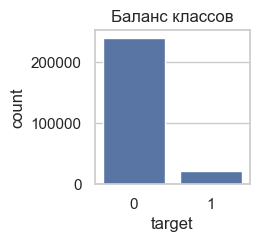

In [19]:
# Баланс классов
target_distribution = df['target'].value_counts(normalize=True) * 100
print("Распределение целевой переменной:")
print(target_distribution)

# Визуализация
plt.figure(figsize=(2, 2))
sns.countplot(x='target', data=df)
plt.title('Баланс классов')
plt.show()

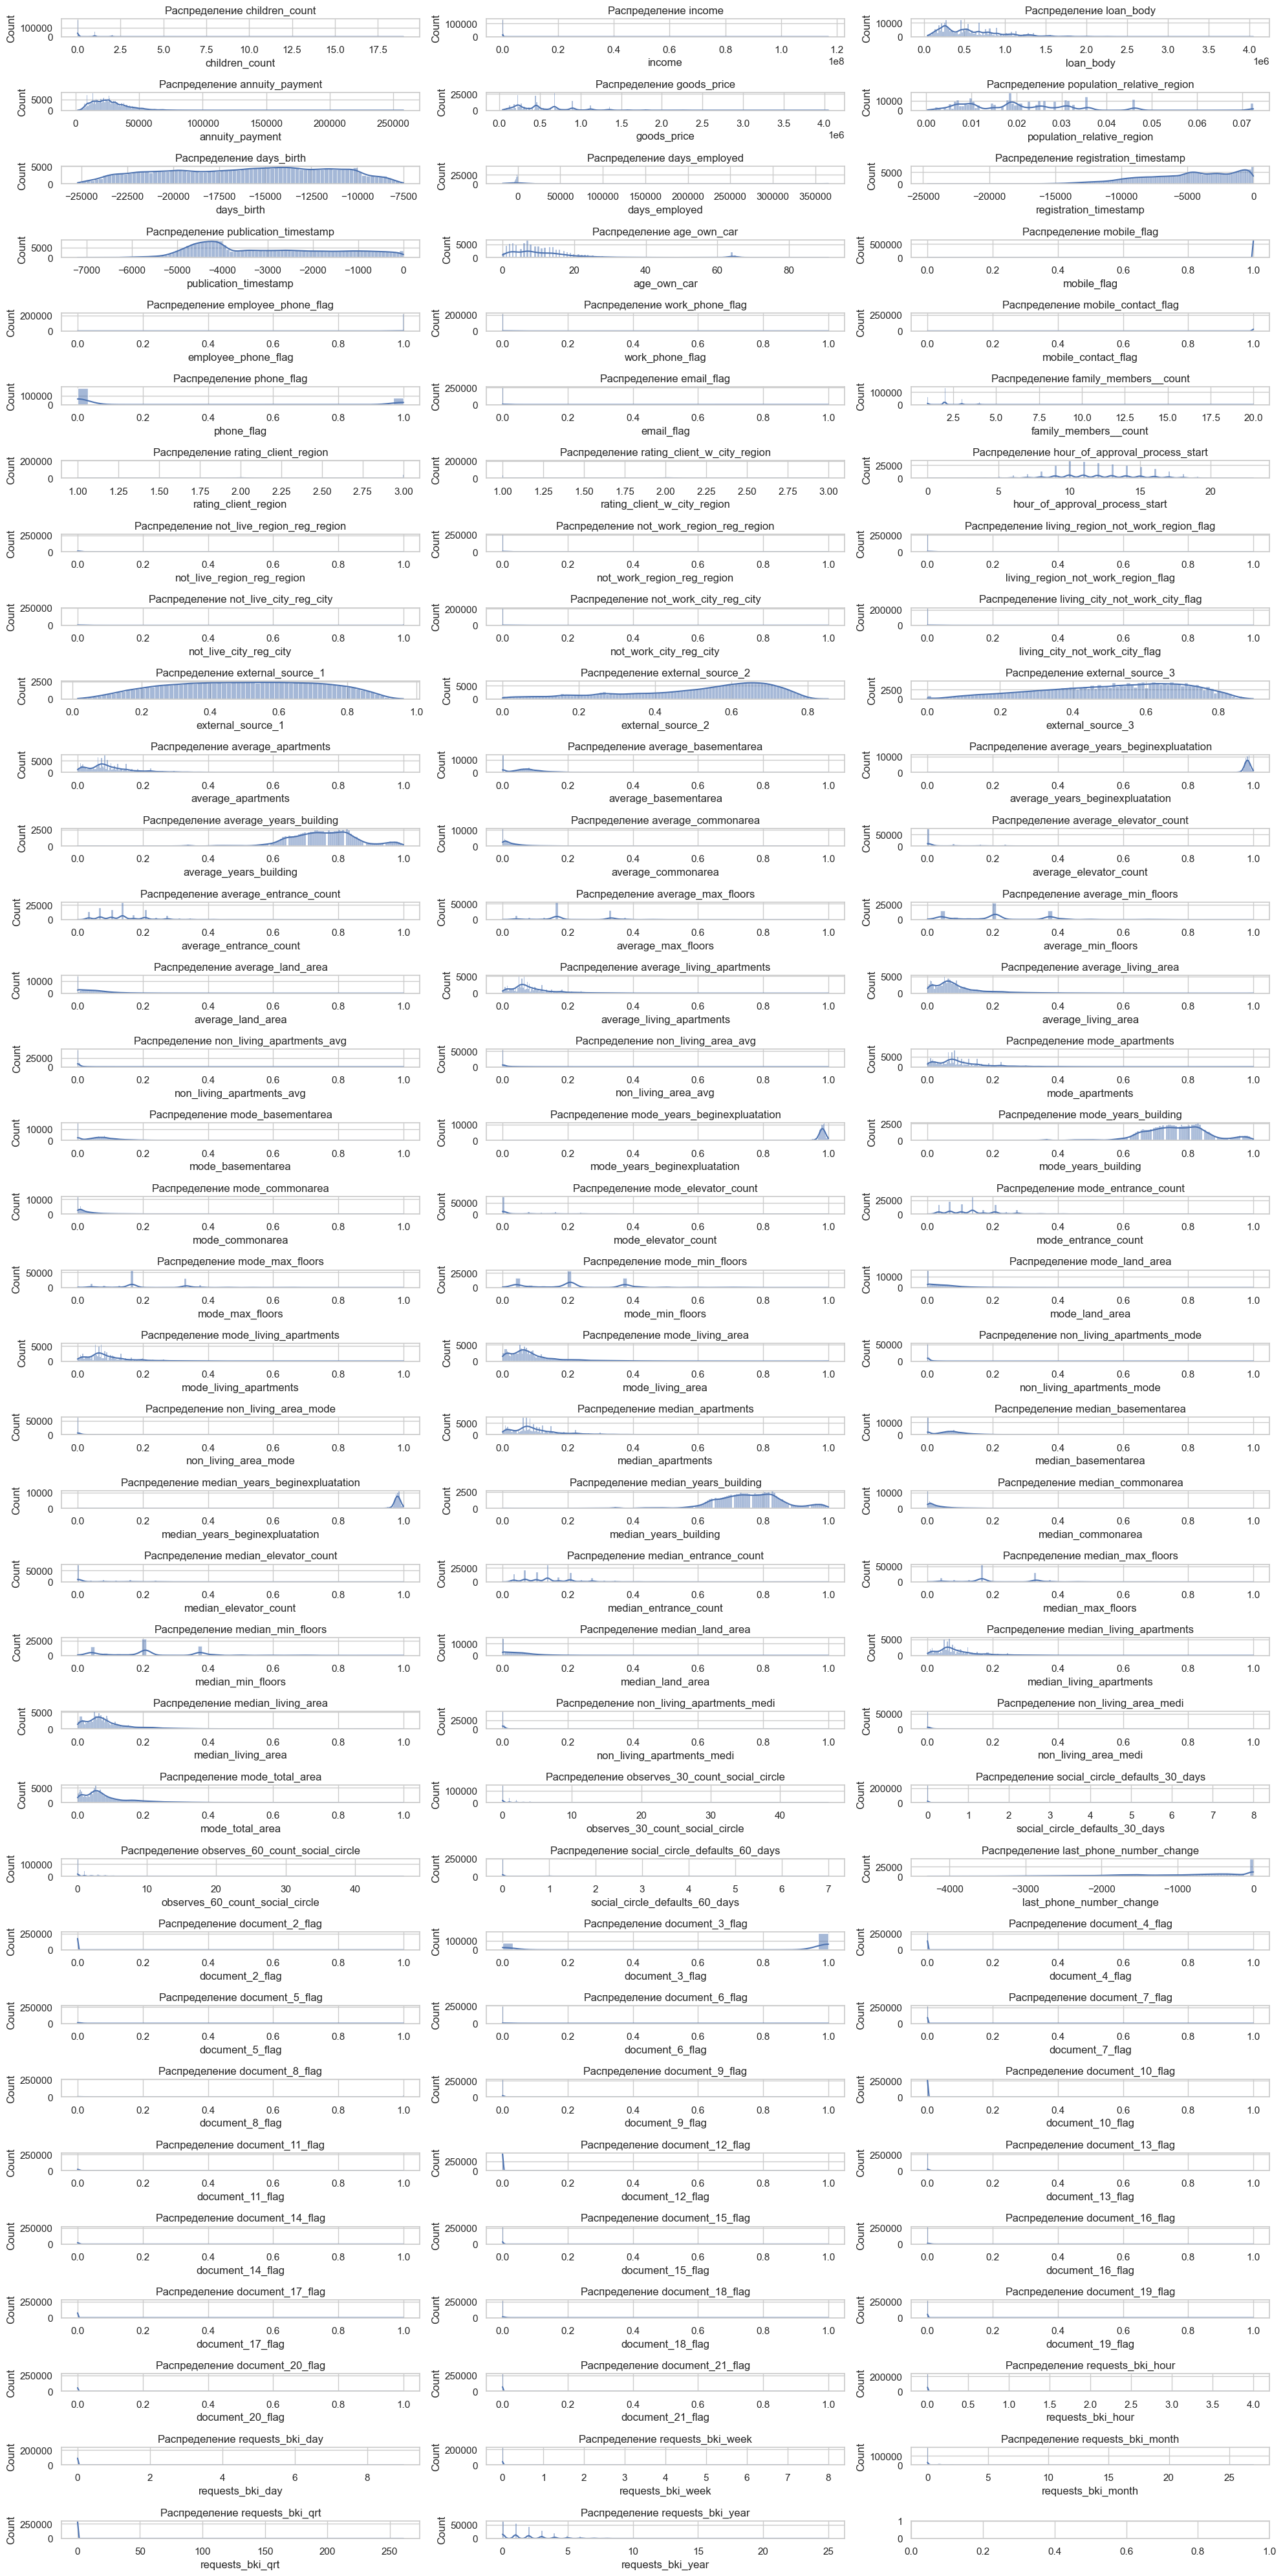

Кол-во числовых признаков 104


In [20]:
# Выделение числовых признаков
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('target')  # Убираем целевую переменную и id
numeric_features.remove('reco_id_curr')

# Визуализация распределений
fig, axes = plt.subplots(nrows=len(numeric_features)//3+1, ncols=3, figsize=(20, 40))
axes = axes.flatten()

for i, col in enumerate(numeric_features[:len(numeric_features)]):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Распределение {col}')

plt.tight_layout()
plt.savefig('result/numeric_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print('Кол-во числовых признаков', len(numeric_features))

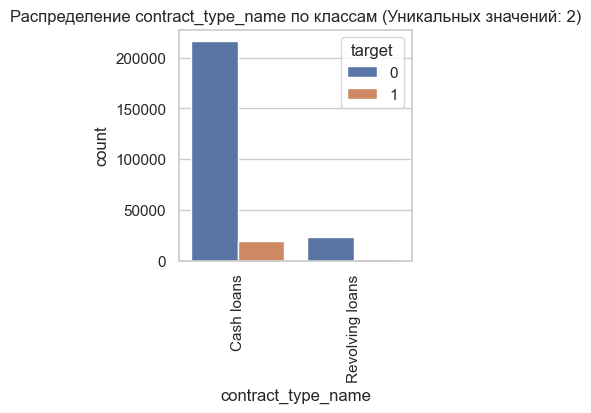

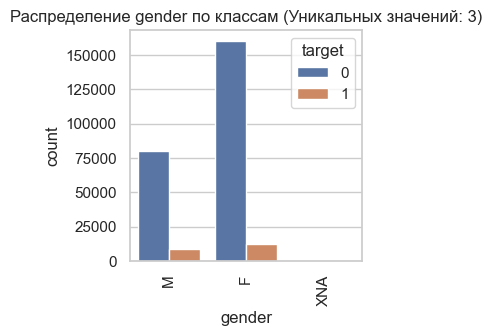

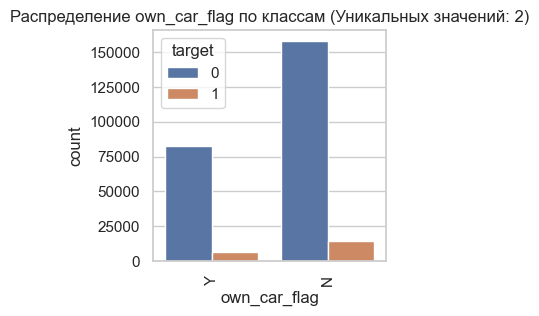

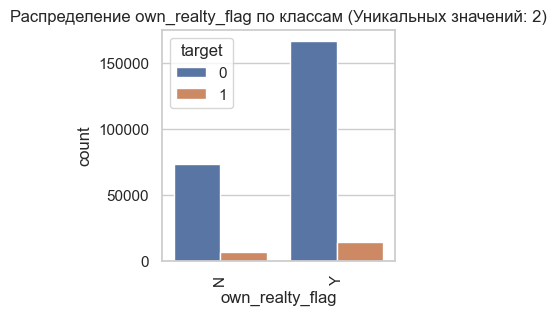

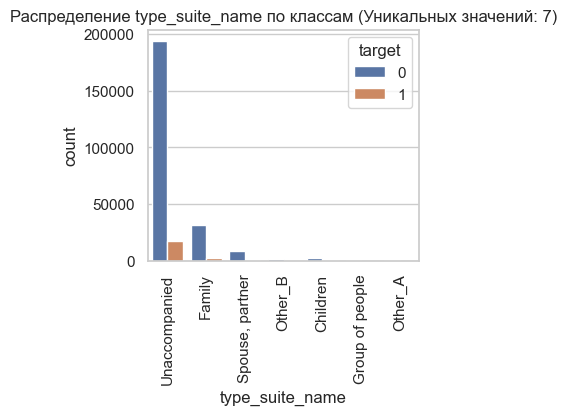

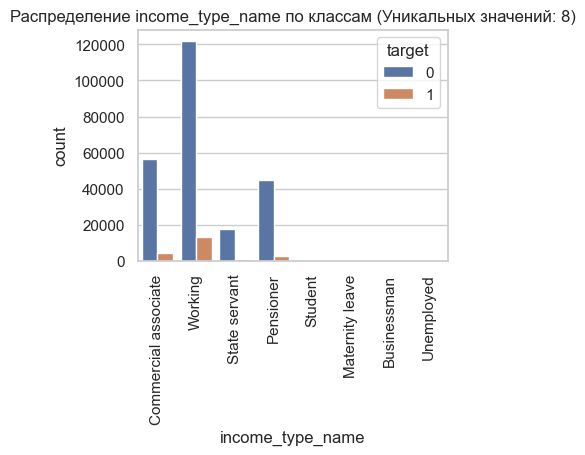

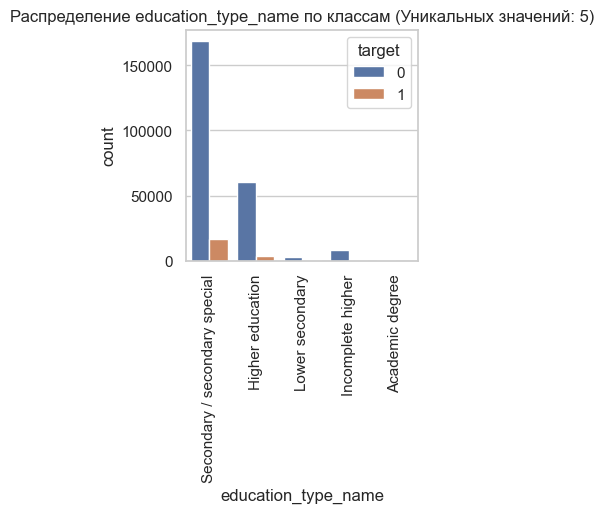

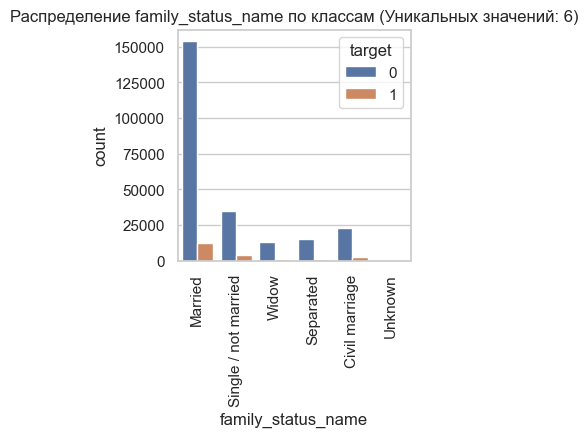

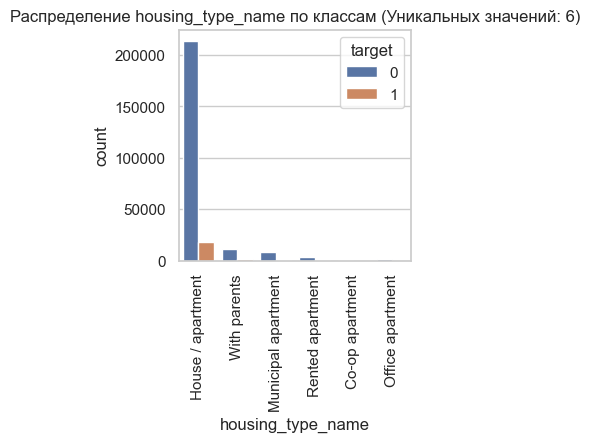

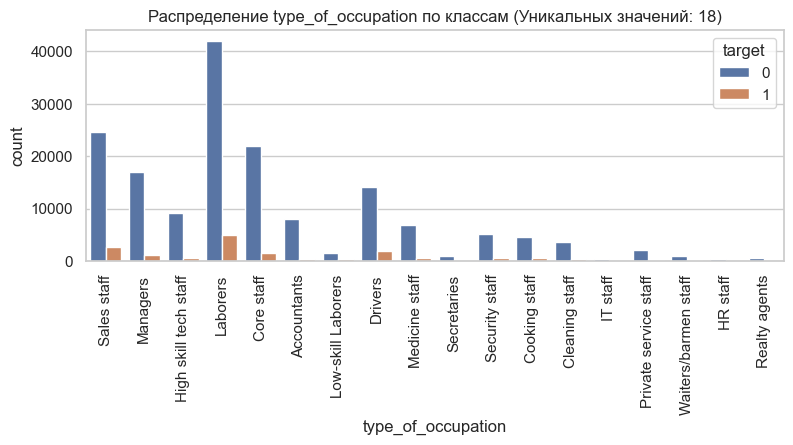

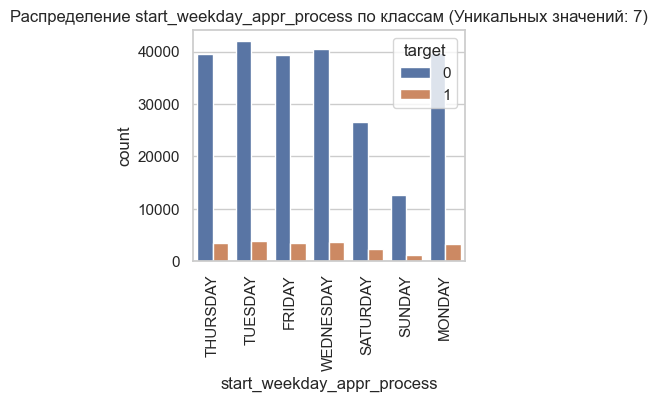

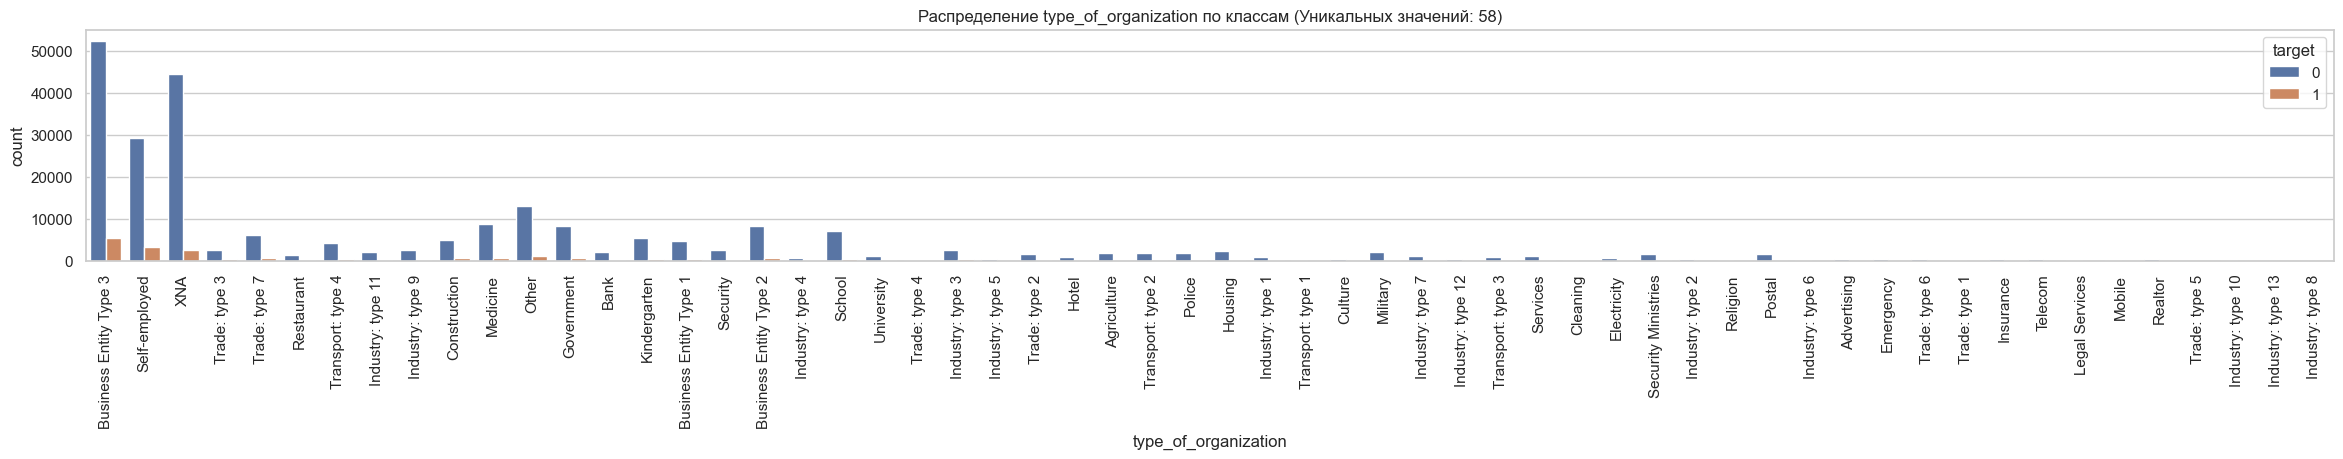

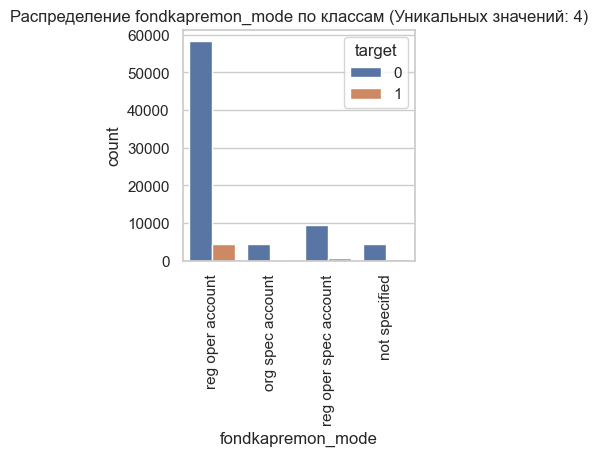

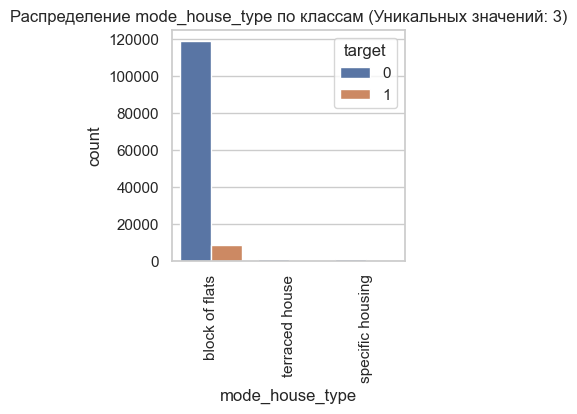

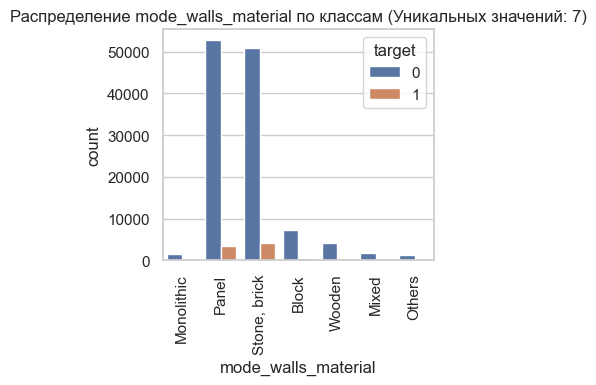

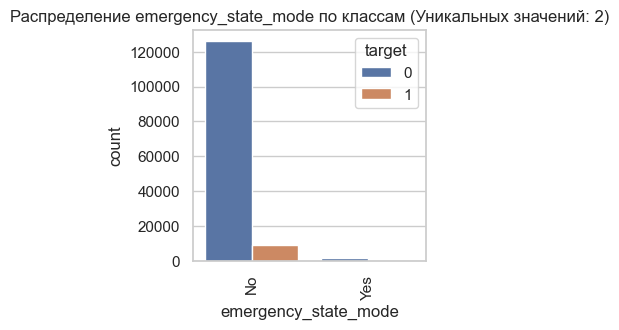

In [21]:
# Выделение категориальных признаков
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Пример анализа для категориальных признаков
for col in categorical_features:
    if col in df.columns:
        # Получаем количество уникальных значений в признаке
        n_unique_values = df[col].nunique()
        
        # Определяем ширину в зависимости от количества уникальных значений
        width_factor = 0.5  
        calculated_width = max(3, n_unique_values * width_factor)  # Минимальная ширина 3
        height = 3
        
        plt.figure(figsize=(calculated_width, height))
        sns.countplot(x=col, hue='target', data=df)
        plt.title(f'Распределение {col} по классам (Уникальных значений: {n_unique_values})')
        plt.xticks(rotation=90)  # Поворот на 90 градусов для лучшей читаемости
        plt.show()


In [22]:
# Корреляция числовых признаков с целевой переменной
correlations = df[numeric_features + ['target']].corr()['target']
correlations = correlations.drop(labels='target', errors='ignore').sort_values(ascending=False)

print("Топ-10 признаков по корреляции с целевой переменной:")
print(correlations.head(10))
print("\nАнти-топ-10:")
print(correlations.tail(10))

Топ-10 признаков по корреляции с целевой переменной:
days_birth                    0.0778
rating_client_w_city_region   0.0617
rating_client_region          0.0597
last_phone_number_change      0.0550
not_work_city_reg_city        0.0529
publication_timestamp         0.0514
employee_phone_flag           0.0451
document_3_flag               0.0449
not_live_city_reg_city        0.0433
registration_timestamp        0.0408
Name: target, dtype: float64

Анти-топ-10:
average_elevator_count       -0.0347
population_relative_region   -0.0378
goods_price                  -0.0398
mode_max_floors              -0.0433
median_max_floors            -0.0439
average_max_floors           -0.0441
days_employed                -0.0441
external_source_1            -0.1549
external_source_2            -0.1612
external_source_3            -0.1801
Name: target, dtype: float64


In [23]:
missing_values = df.isnull().mean() * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

if not missing_values.empty:
    print(f"\nПризнаки с пропусками:")
    print(missing_values.to_string(float_format='%.2f%%'))
else:
    print("\nПропущенные значения отсутствуют в датасете.")


Признаки с пропусками:
median_commonarea                 69.89%
mode_commonarea                   69.89%
average_commonarea                69.89%
non_living_apartments_mode        69.45%
non_living_apartments_medi        69.45%
non_living_apartments_avg         69.45%
fondkapremon_mode                 68.41%
average_living_apartments         68.38%
median_living_apartments          68.38%
mode_living_apartments            68.38%
median_min_floors                 67.88%
mode_min_floors                   67.88%
average_min_floors                67.88%
mode_years_building               66.53%
median_years_building             66.53%
average_years_building            66.53%
age_own_car                       66.01%
average_land_area                 59.38%
median_land_area                  59.38%
mode_land_area                    59.38%
mode_basementarea                 58.51%
median_basementarea               58.51%
average_basementarea              58.51%
external_source_1                

Размер обучающей выборки: (261384, 122)

2. АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ

Распределение целевой переменной:
Клиенты без проблем (0): 240274 (91.92%)
Клиенты с проблемами (1): 21110 (8.08%)


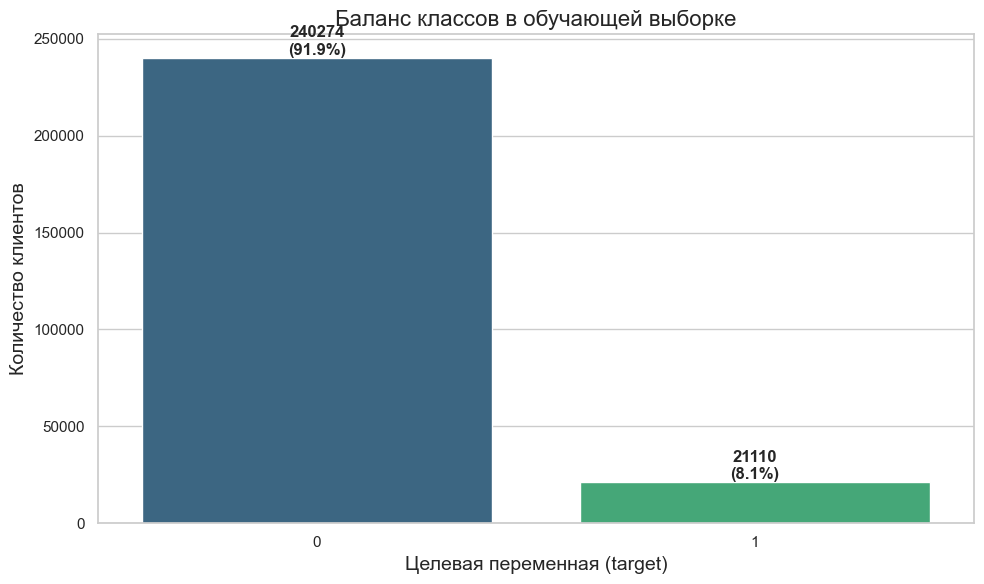


3. АНАЛИЗ ДЕМОГРАФИЧЕСКИХ ПРИЗНАКОВ

3.1 Анализ возраста клиентов


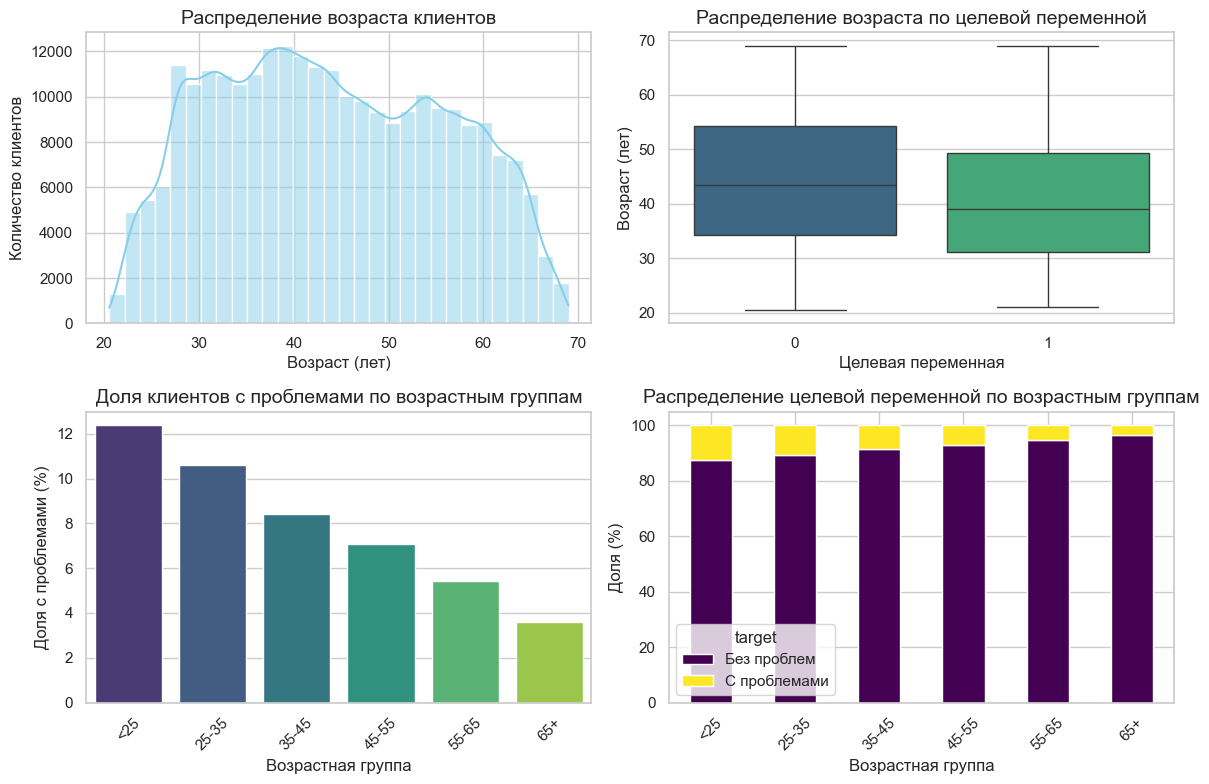


T-test для возраста по целевой переменной:
T-statistic: 39.8782, p-value: 0.000000
Статистически значимые различия в возрасте между классами

3.2 Анализ пола клиентов


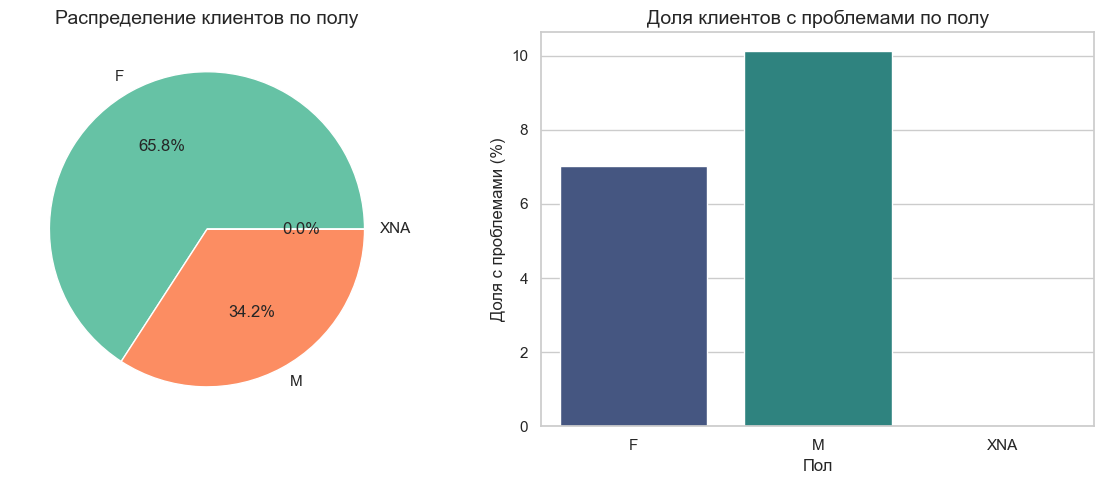


Chi-square test для пола и целевой переменной:
Chi2 statistic: 766.6101, p-value: 0.000000
Contingency table:
target       0      1
gender               
F       160032  12071
M        80238   9039
XNA          4      0

3.3 Анализ семейного положения и детей


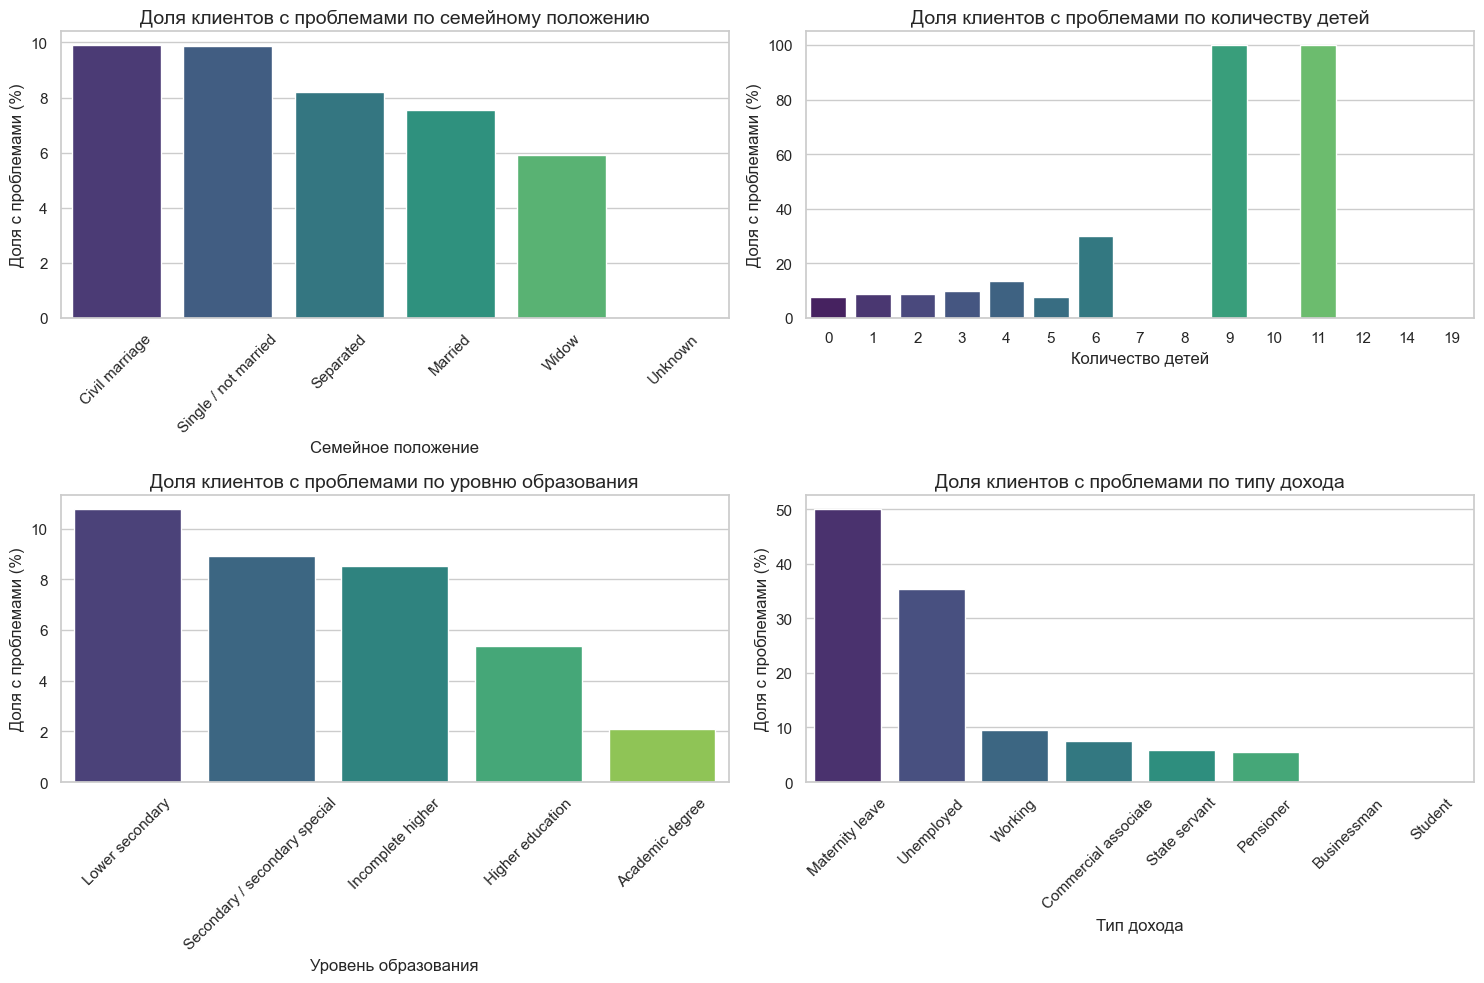


4. АНАЛИЗ ФИНАНСОВЫХ ПРИЗНАКОВ

Доступные финансовые признаки: ['income', 'loan_body', 'annuity_payment', 'goods_price']


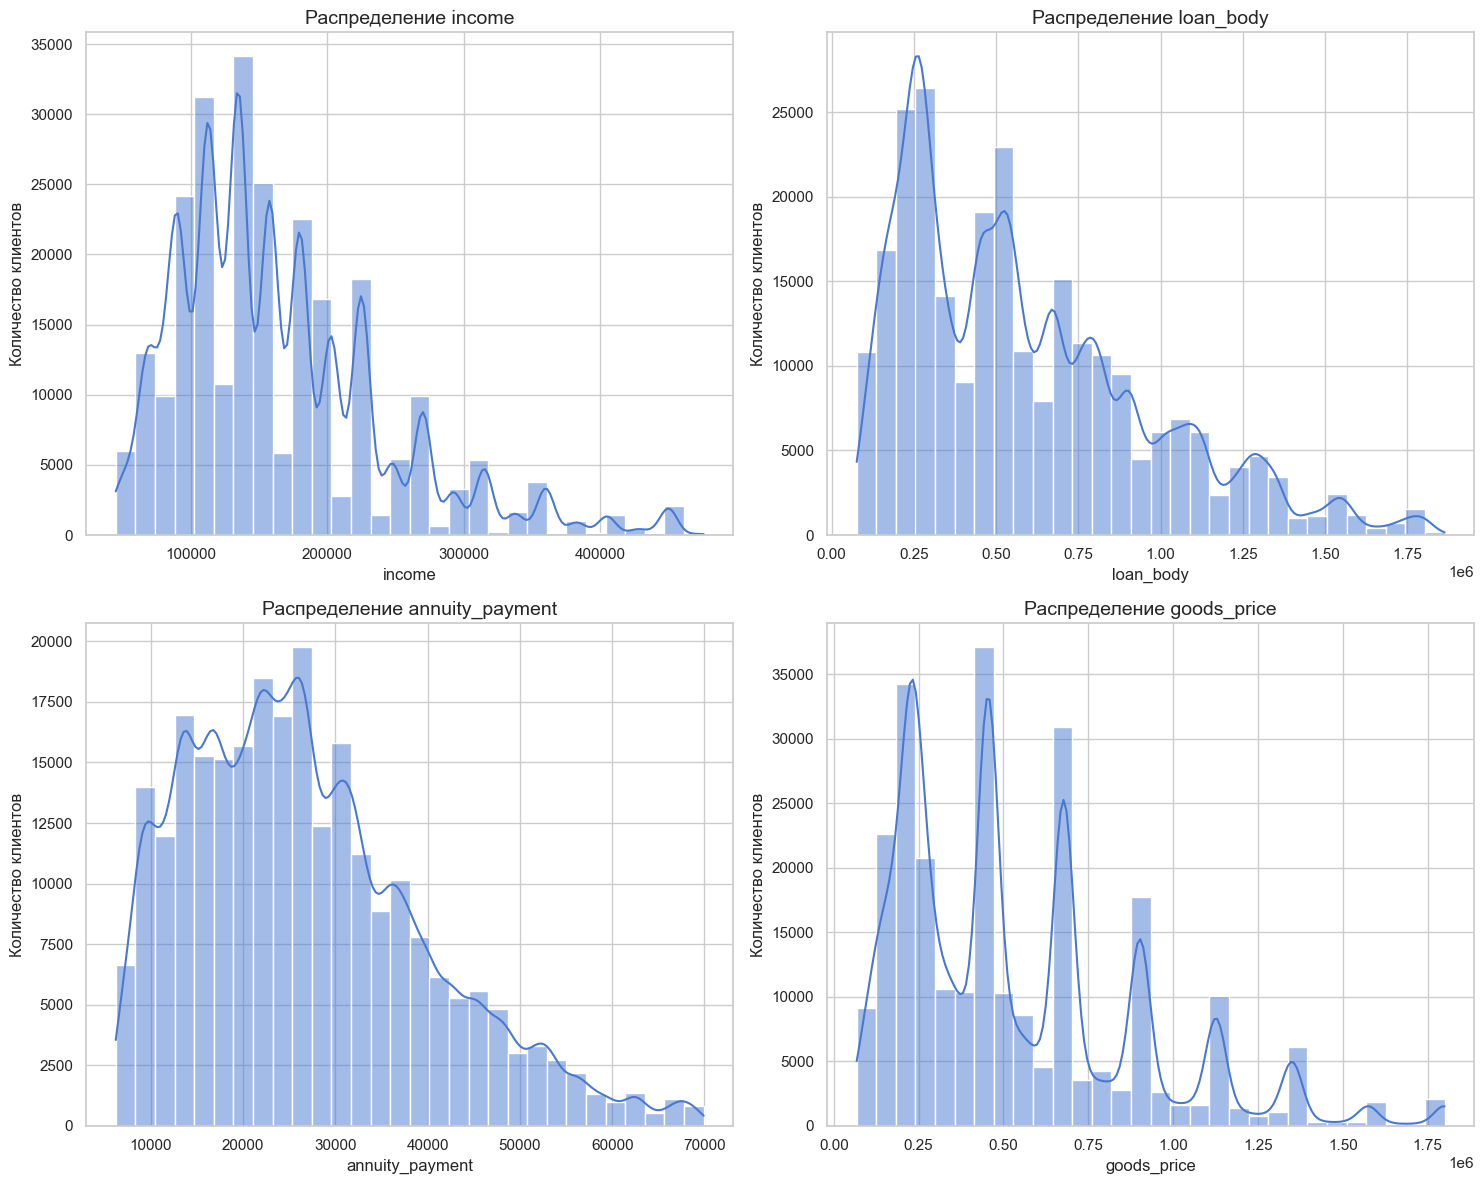

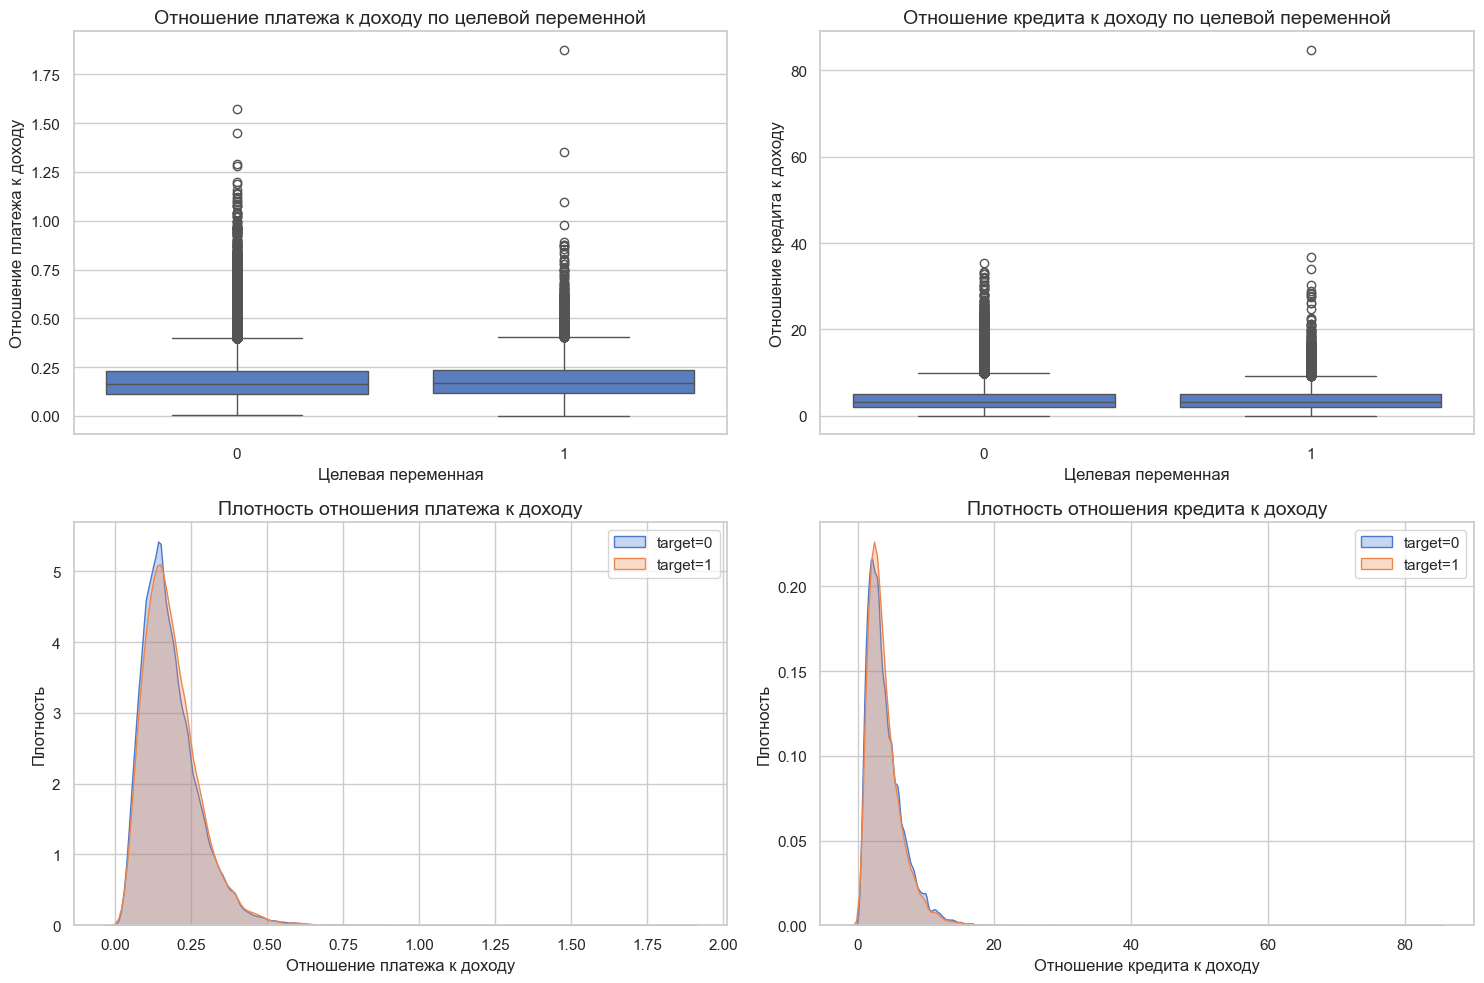


Статистический анализ финансовых признаков:

INCOME:
Среднее значение: 168923.79
Медиана: 148500.00
Стандартное отклонение: 253791.19
Минимум: 25650.00
Максимум: 117000000.00
Среднее для target=0: 169144.73
Среднее для target=1: 166409.13
T-statistic: 1.5015, p-value: 0.133219

LOAN_BODY:
Среднее значение: 599186.56
Медиана: 513531.00
Стандартное отклонение: 402330.88
Минимум: 45000.00
Максимум: 4050000.00
Среднее для target=0: 602826.39
Среднее для target=1: 557758.03
T-statistic: 15.6116, p-value: 0.000000

ANNUITY_PAYMENT:
Среднее значение: 27106.79
Медиана: 24903.00
Стандартное отклонение: 14486.79
Минимум: 1615.50
Максимум: 258025.50
Среднее для target=0: 27166.93
Среднее для target=1: 26422.31
T-statistic: 7.1608, p-value: 0.000000

GOODS_PRICE:
Среднее значение: 538565.19
Медиана: 450000.00
Стандартное отклонение: 369284.94
Минимум: 40500.00
Максимум: 4050000.00
Среднее для target=0: 542918.58
Среднее для target=1: 489014.27
T-statistic: 20.3408, p-value: 0.000000

5. АНАЛИЗ ВН

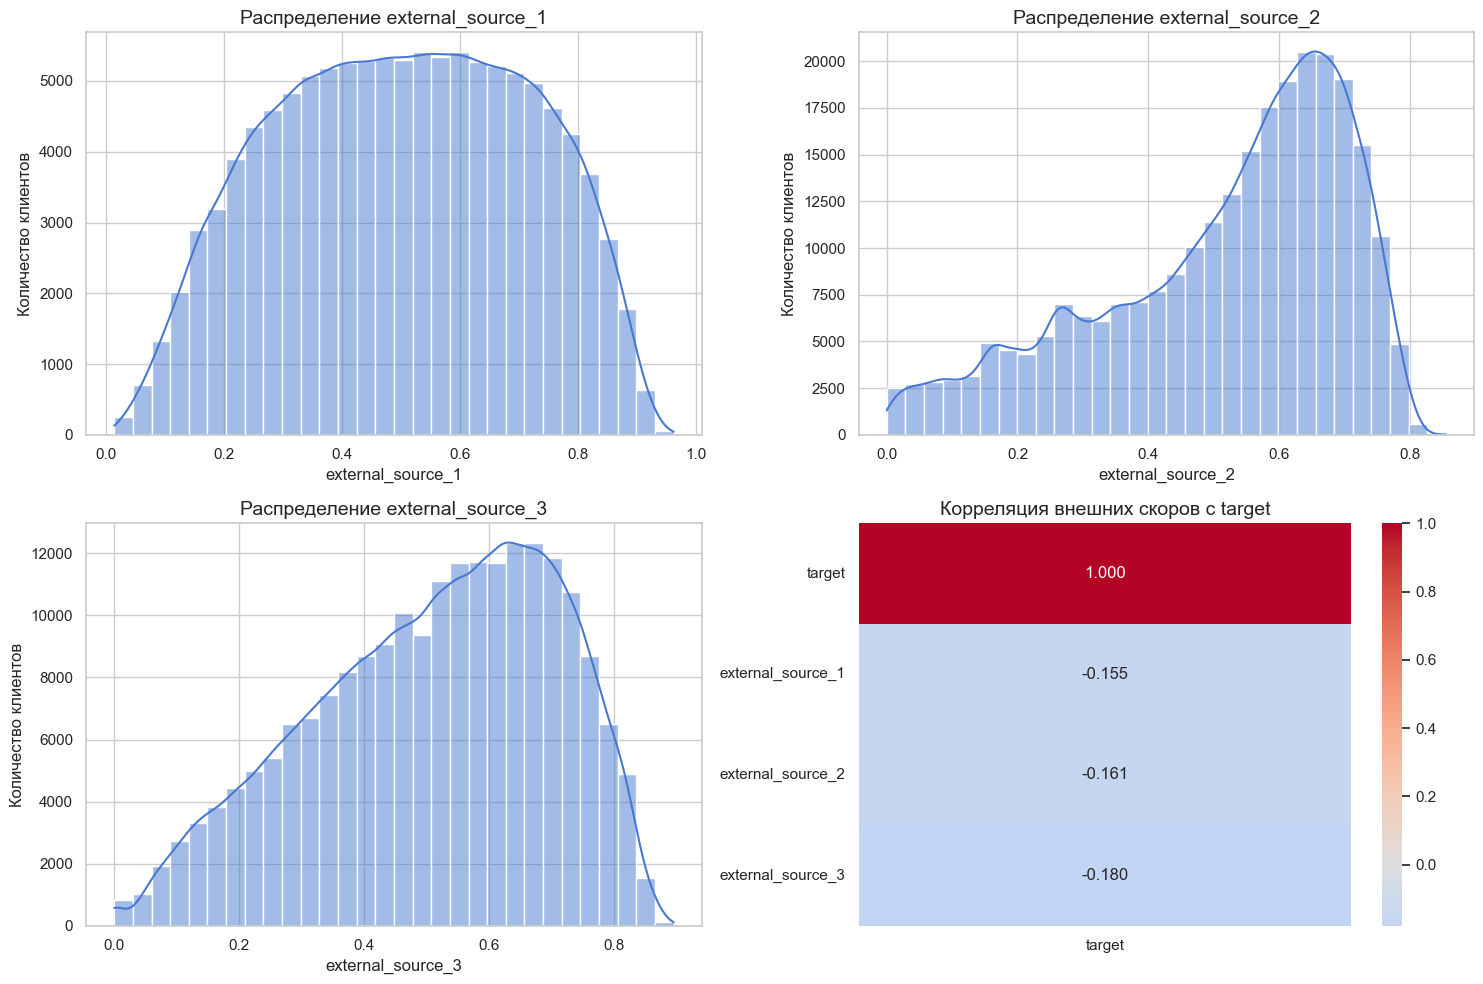

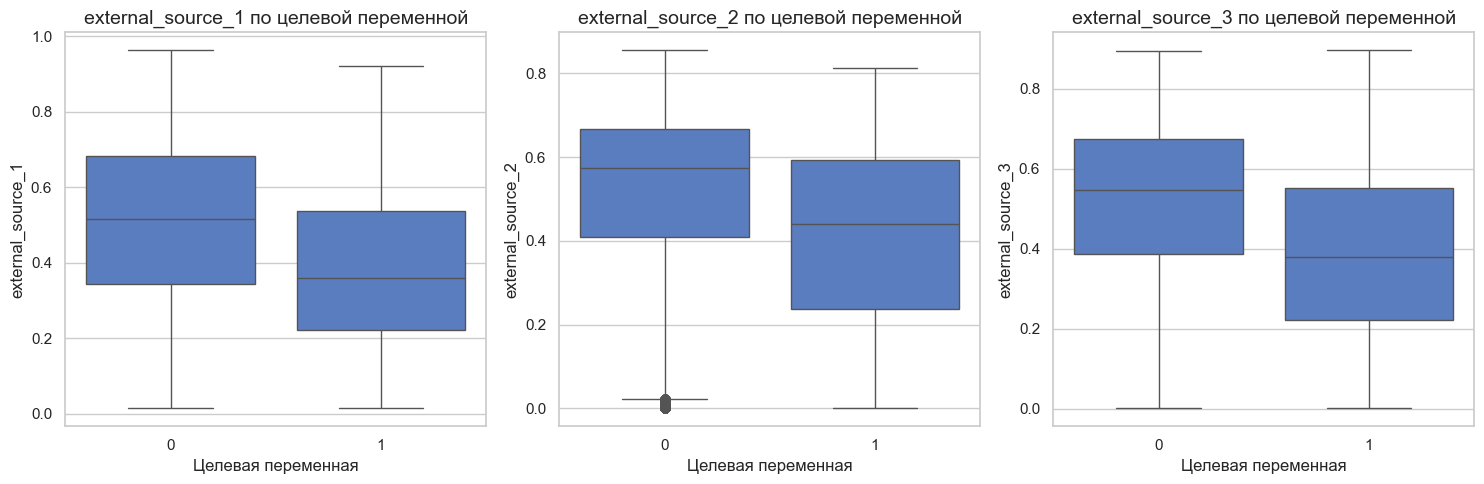


Анализ комбинации внешних скоров:


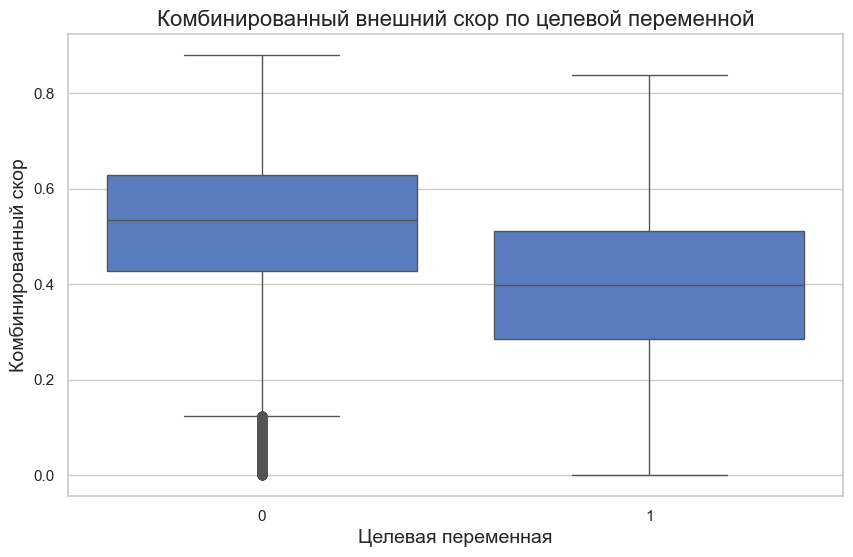


ROC-AUC для внешних скоров:
external_source_1: 0.3347
external_source_2: 0.3429
external_source_3: 0.3195
Комбинированный скор: 0.2827

6. АНАЛИЗ ПРИЗНАКОВ ИЗ БКИ

Доступные признаки из БКИ: ['requests_bki_hour', 'requests_bki_day', 'requests_bki_week', 'requests_bki_month', 'requests_bki_qrt', 'requests_bki_year']


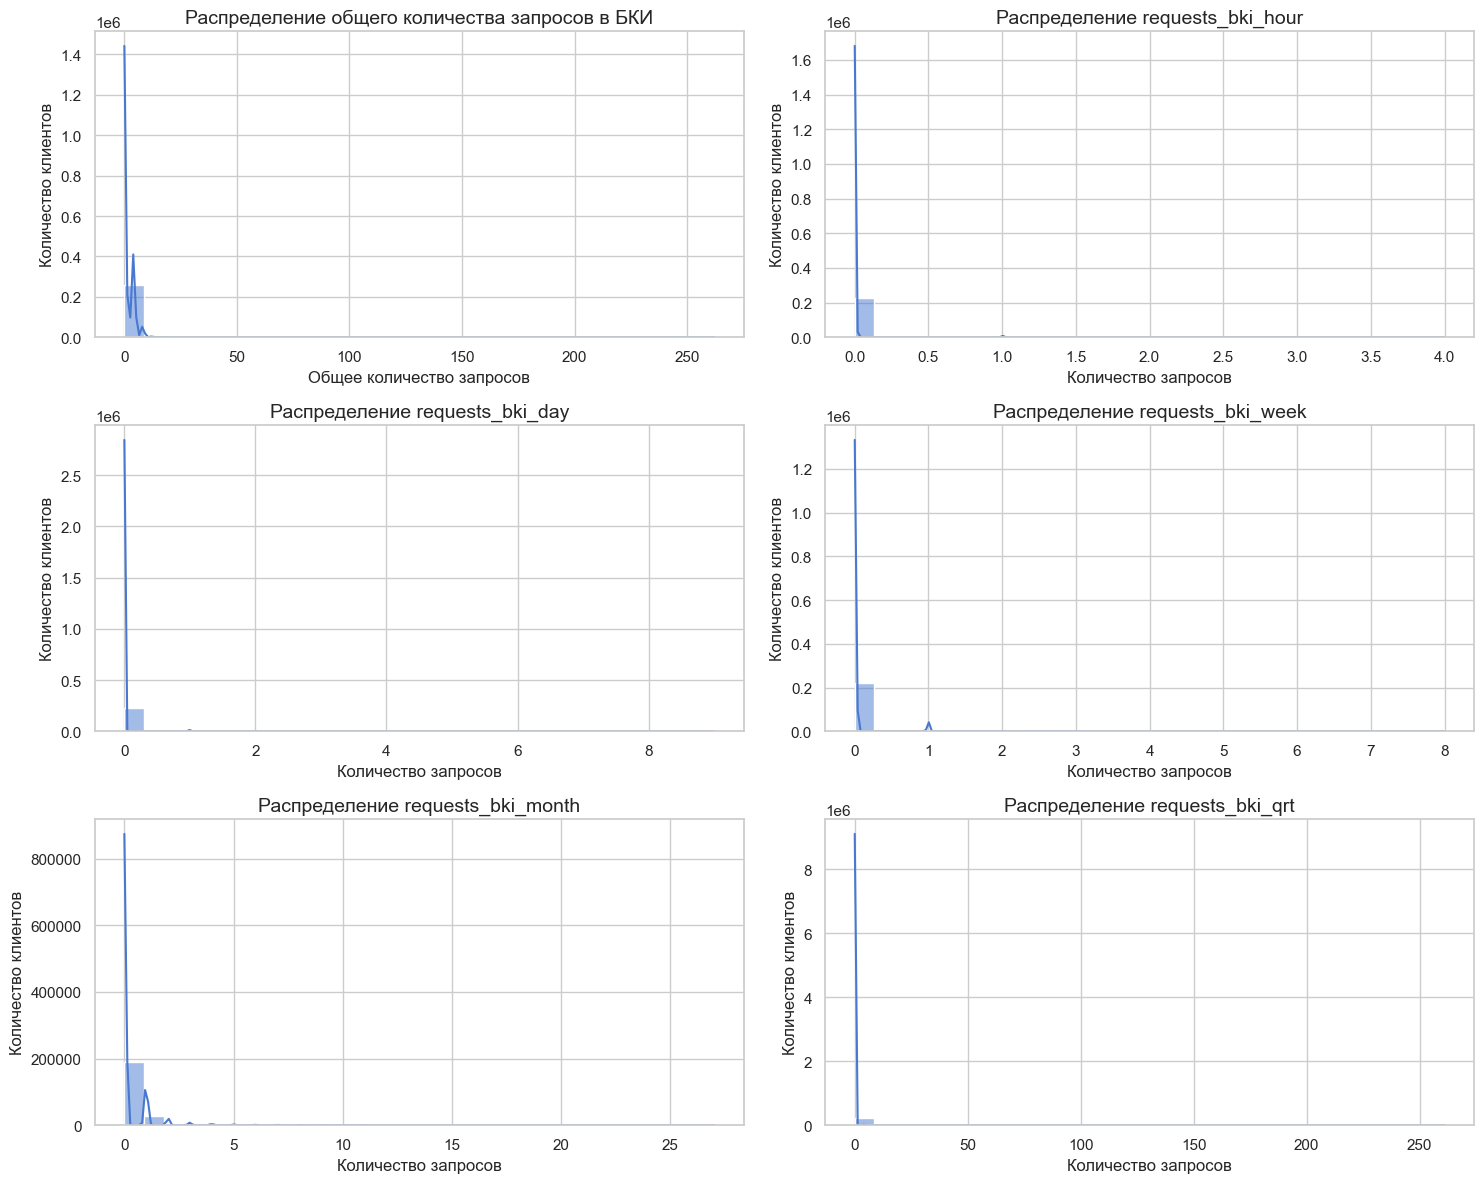

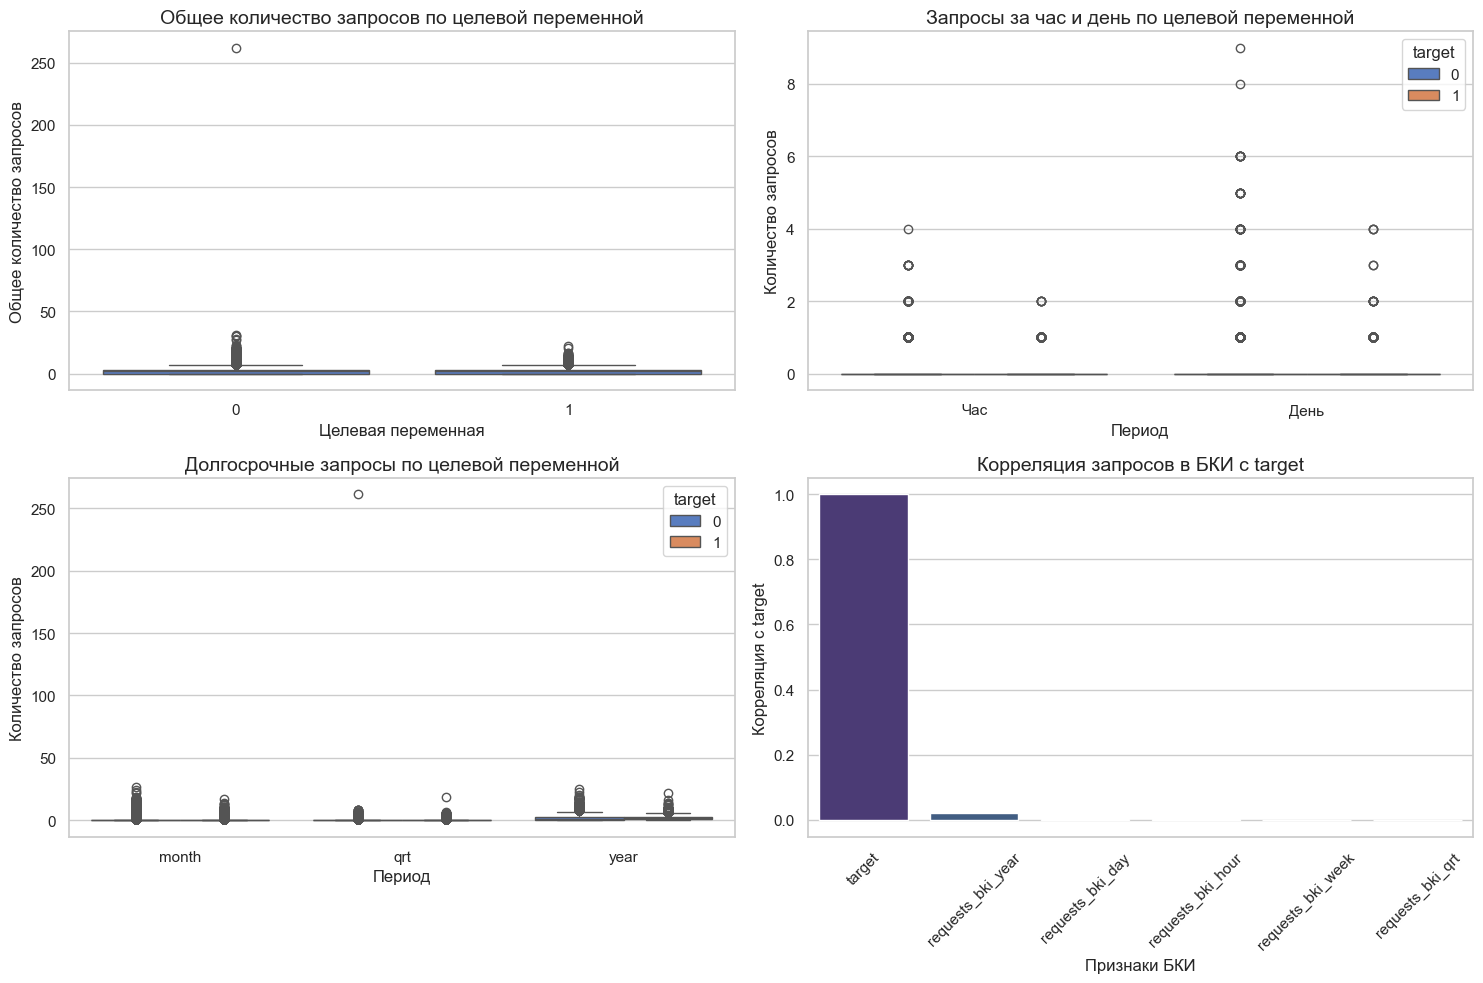


Анализ паттернов запросов в БКИ:
Количество клиентов с высоким количеством запросов (>95%): 12726
Доля клиентов с проблемами среди них: 8.55%
Общая доля клиентов с проблемами: 8.08%


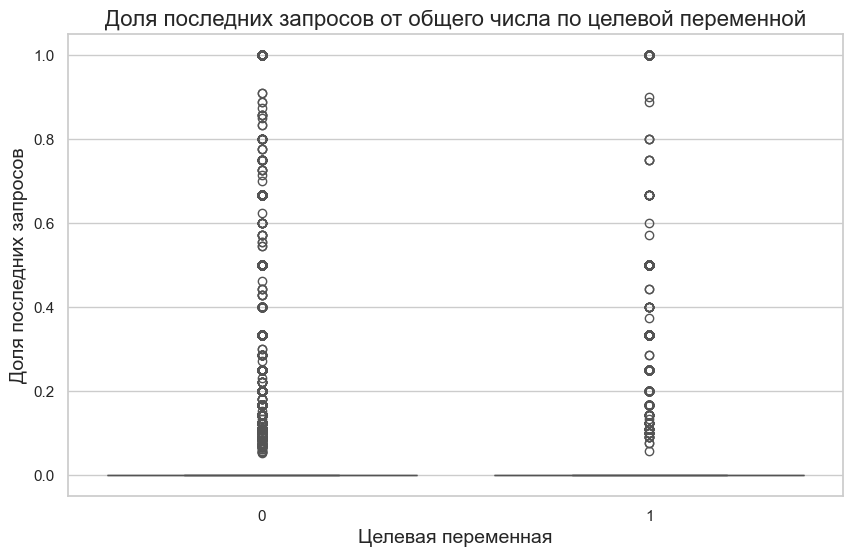


7. МУЛЬТИФАКТОРНЫЙ АНАЛИЗ


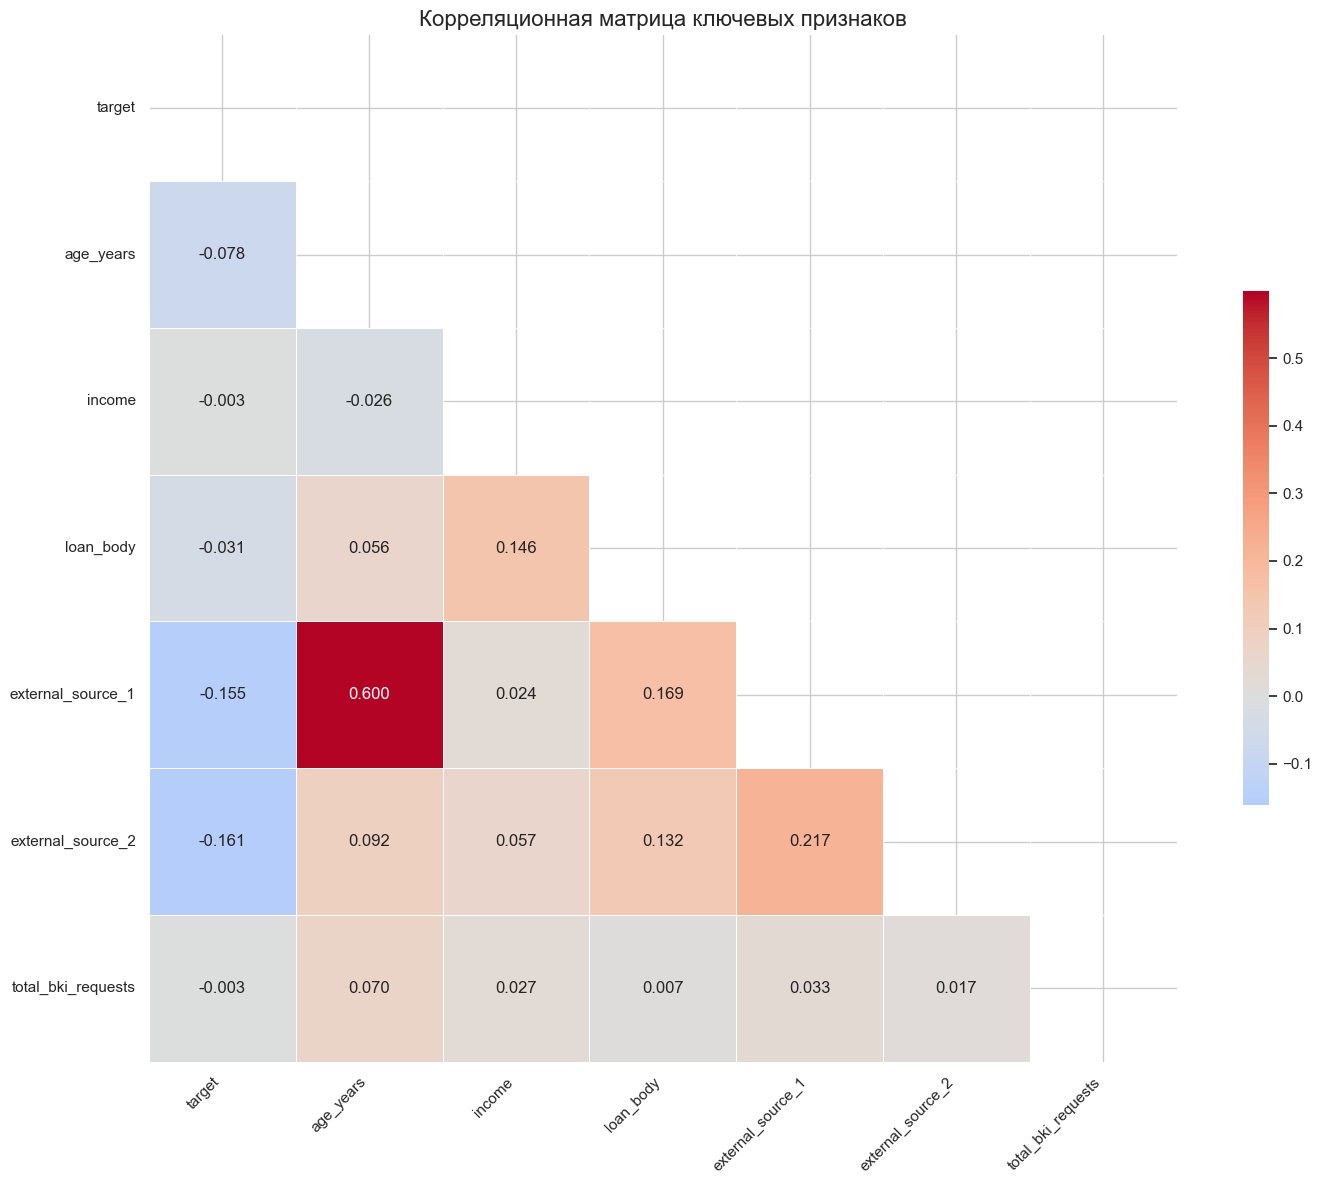

<Figure size 1200x800 with 0 Axes>

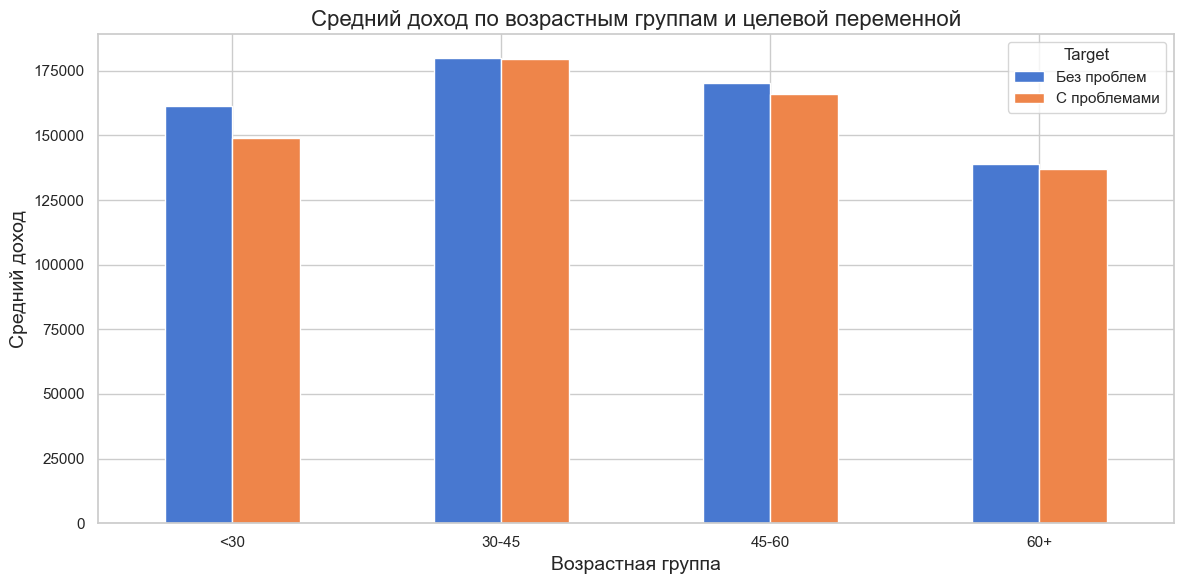

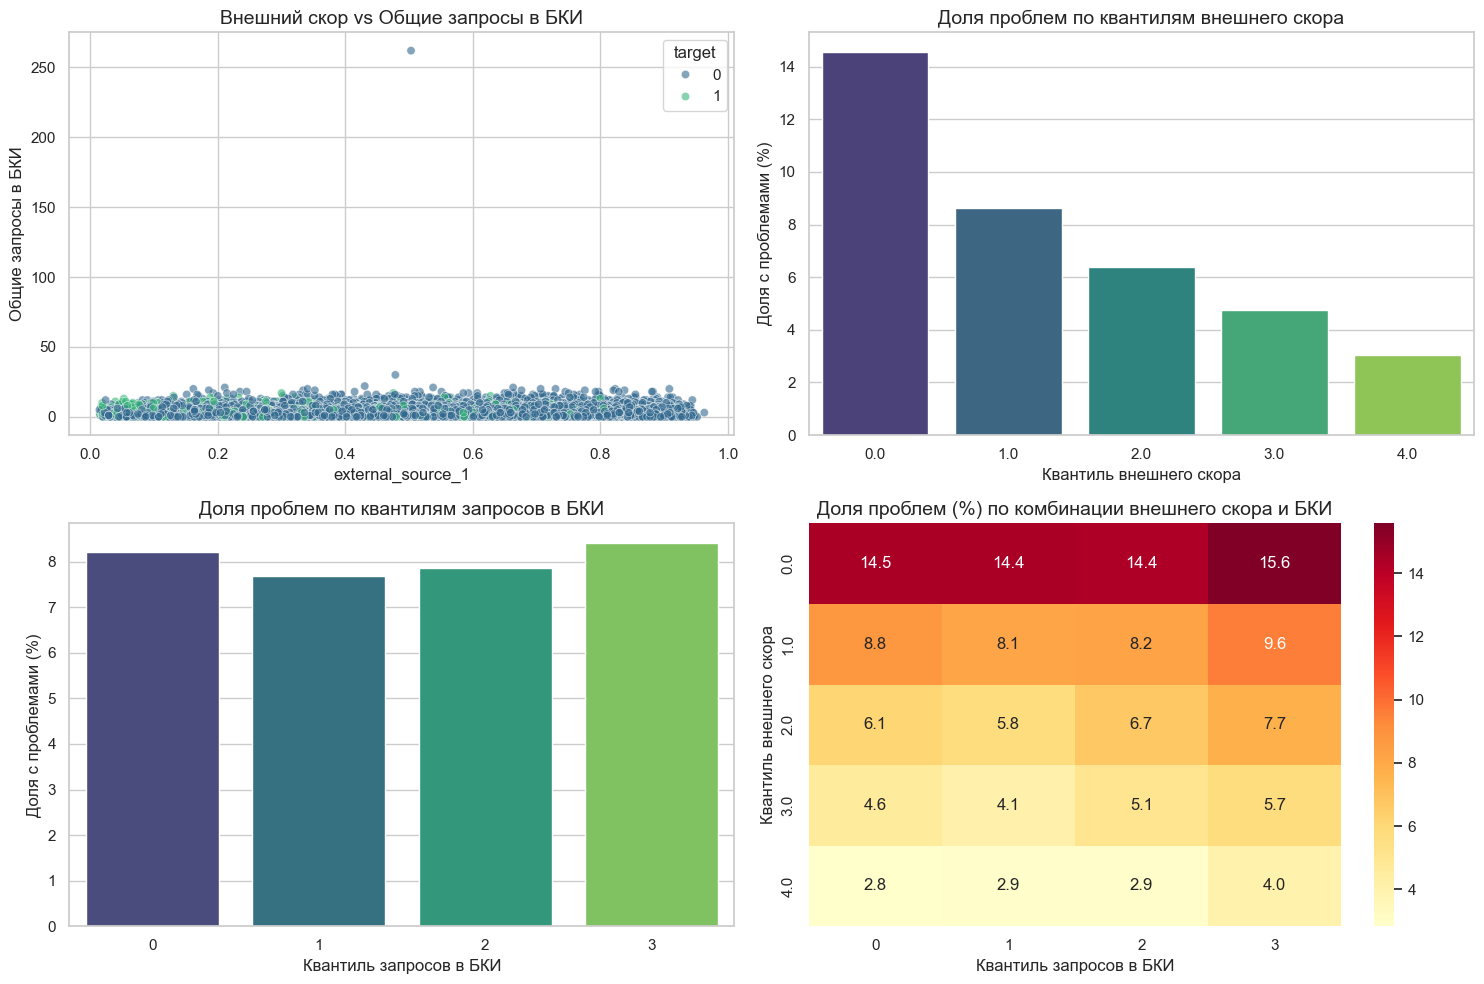

In [24]:
# Более подробный анализ коючевых признаков и их кореляции с целевой переменной

# 1. Импорт библиотек и загрузка данных
warnings.filterwarnings('ignore')

# Настройка отображения
plt.style.use('ggplot')
sns.set(style="whitegrid", palette="muted")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

# Загрузка данных
train_df = pd.read_csv('data.csv')

print(f"Размер обучающей выборки: {train_df.shape}")

# 2. Анализ целевой переменной
print("\n" + "="*70)
print("2. АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ")
print("="*70)

# Баланс классов
target_counts = train_df['target'].value_counts()
target_percent = target_counts / len(train_df) * 100

print("\nРаспределение целевой переменной:")
print(f"Клиенты без проблем (0): {target_counts[0]} ({target_percent[0]:.2f}%)")
print(f"Клиенты с проблемами (1): {target_counts[1]} ({target_percent[1]:.2f}%)")

# Визуализация баланса классов
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='target', data=train_df, palette='viridis')
plt.title('Баланс классов в обучающей выборке', fontsize=16)
plt.xlabel('Целевая переменная (target)', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=14)

# Добавление процентов на столбцы
for i, v in enumerate(target_counts):
    ax.text(i, v + 50, f'{v}\n({target_percent[i]:.1f}%)', 
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('result/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Анализ демографических признаков
print("\n" + "="*70)
print("3. АНАЛИЗ ДЕМОГРАФИЧЕСКИХ ПРИЗНАКОВ")
print("="*70)

# 3.1 Анализ возраста (days_birth)
print("\n3.1 Анализ возраста клиентов")
train_df['age_years'] = abs(train_df['days_birth']) / 365.25

plt.figure(figsize=(12, 8))
# Гистограмма распределения возраста
plt.subplot(2, 2, 1)
sns.histplot(train_df['age_years'], bins=30, kde=True, color='skyblue')
plt.title('Распределение возраста клиентов', fontsize=14)
plt.xlabel('Возраст (лет)', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)

# Boxplot возраста по целевой переменной
plt.subplot(2, 2, 2)
sns.boxplot(x='target', y='age_years', data=train_df, palette='viridis')
plt.title('Распределение возраста по целевой переменной', fontsize=14)
plt.xlabel('Целевая переменная', fontsize=12)
plt.ylabel('Возраст (лет)', fontsize=12)

# Анализ доли клиентов с проблемами по возрастным группам
plt.subplot(2, 2, 3)
# Создание возрастных групп
train_df['age_group'] = pd.cut(train_df['age_years'], 
                              bins=[0, 25, 35, 45, 55, 65, 100], 
                              labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'])
age_group_target = train_df.groupby('age_group')['target'].mean() * 100
sns.barplot(x=age_group_target.index, y=age_group_target.values, palette='viridis')
plt.title('Доля клиентов с проблемами по возрастным группам', fontsize=14)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Доля с проблемами (%)', fontsize=12)
plt.xticks(rotation=45)

# Распределение клиентов по возрастным группам и target
plt.subplot(2, 2, 4)
age_target_counts = train_df.groupby(['age_group', 'target']).size().unstack()
age_target_counts_pct = age_target_counts.div(age_target_counts.sum(axis=1), axis=0) * 100
age_target_counts_pct.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
plt.title('Распределение целевой переменной по возрастным группам', fontsize=14)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Доля (%)', fontsize=12)
plt.legend(title='target', labels=['Без проблем', 'С проблемами'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('result/age_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Статистический тест для возраста
t_stat, p_val = stats.ttest_ind(
    train_df[train_df['target'] == 0]['age_years'],
    train_df[train_df['target'] == 1]['age_years']
)
print(f"\nT-test для возраста по целевой переменной:")
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.6f}")
print("Статистически значимые различия в возрасте между классами" if p_val < 0.05 else "Нет статистически значимых различий в возрасте")

# 3.2 Анализ пола (gender)
print("\n3.2 Анализ пола клиентов")
if 'gender' in train_df.columns:
    gender_counts = train_df['gender'].value_counts()
    gender_target = train_df.groupby('gender')['target'].mean() * 100
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb'])
    plt.title('Распределение клиентов по полу', fontsize=14)
    plt.ylabel('')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x=gender_target.index, y=gender_target.values, palette='viridis')
    plt.title('Доля клиентов с проблемами по полу', fontsize=14)
    plt.xlabel('Пол', fontsize=12)
    plt.ylabel('Доля с проблемами (%)', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('result/gender_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Хи-квадрат тест для пола и целевой переменной
    contingency_table = pd.crosstab(train_df['gender'], train_df['target'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-square test для пола и целевой переменной:")
    print(f"Chi2 statistic: {chi2:.4f}, p-value: {p:.6f}")
    print(f"Contingency table:\n{contingency_table}")

# 3.3 Анализ семейного положения и детей
print("\n3.3 Анализ семейного положения и детей")
if 'family_status_name' in train_df.columns and 'children_count' in train_df.columns:
    
    plt.figure(figsize=(15, 10))
    
    # Семейное положение и target
    plt.subplot(2, 2, 1)
    family_target = train_df.groupby('family_status_name')['target'].mean().sort_values(ascending=False) * 100
    sns.barplot(x=family_target.index, y=family_target.values, palette='viridis')
    plt.title('Доля клиентов с проблемами по семейному положению', fontsize=14)
    plt.xlabel('Семейное положение', fontsize=12)
    plt.ylabel('Доля с проблемами (%)', fontsize=12)
    plt.xticks(rotation=45)
    
    # Количество детей и target
    plt.subplot(2, 2, 2)
    children_target = train_df.groupby('children_count')['target'].mean() * 100
    sns.barplot(x=children_target.index, y=children_target.values, palette='viridis')
    plt.title('Доля клиентов с проблемами по количеству детей', fontsize=14)
    plt.xlabel('Количество детей', fontsize=12)
    plt.ylabel('Доля с проблемами (%)', fontsize=12)
    
    # Образование и target
    if 'education_type_name' in train_df.columns:
        plt.subplot(2, 2, 3)
        edu_target = train_df.groupby('education_type_name')['target'].mean().sort_values(ascending=False) * 100
        sns.barplot(x=edu_target.index, y=edu_target.values, palette='viridis')
        plt.title('Доля клиентов с проблемами по уровню образования', fontsize=14)
        plt.xlabel('Уровень образования', fontsize=12)
        plt.ylabel('Доля с проблемами (%)', fontsize=12)
        plt.xticks(rotation=45)
    
    # Тип дохода и target
    if 'income_type_name' in train_df.columns:
        plt.subplot(2, 2, 4)
        income_type_target = train_df.groupby('income_type_name')['target'].mean().sort_values(ascending=False) * 100
        sns.barplot(x=income_type_target.index, y=income_type_target.values, palette='viridis')
        plt.title('Доля клиентов с проблемами по типу дохода', fontsize=14)
        plt.xlabel('Тип дохода', fontsize=12)
        plt.ylabel('Доля с проблемами (%)', fontsize=12)
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig('result/demographic_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# 4. Анализ финансовых признаков
print("\n" + "="*70)
print("4. АНАЛИЗ ФИНАНСОВЫХ ПРИЗНАКОВ")
print("="*70)

financial_features = ['income', 'loan_body', 'annuity_payment', 'goods_price']

# Проверка наличия признаков в датасете
available_financial_features = [feat for feat in financial_features if feat in train_df.columns]

if available_financial_features:
    print(f"\nДоступные финансовые признаки: {available_financial_features}")
    
    # 4.1 Анализ распределений финансовых признаков
    plt.figure(figsize=(15, 12))
    for i, feature in enumerate(available_financial_features, 1):
        plt.subplot(2, 2, i)
        # Убираем выбросы для визуализации
        q1 = train_df[feature].quantile(0.01)
        q99 = train_df[feature].quantile(0.99)
        filtered_data = train_df[(train_df[feature] >= q1) & (train_df[feature] <= q99)][feature]
        
        sns.histplot(filtered_data, bins=30, kde=True)
        plt.title(f'Распределение {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Количество клиентов', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('result/financial_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 4.2 Анализ отношений между финансовыми признаками и target
    plt.figure(figsize=(15, 10))
    
    # Отношение платежа к доходу
    if 'annuity_payment' in train_df.columns and 'income' in train_df.columns:
        train_df['payment_to_income'] = train_df['annuity_payment'] / train_df['income']
        plt.subplot(2, 2, 1)
        sns.boxplot(x='target', y='payment_to_income', data=train_df)
        plt.title('Отношение платежа к доходу по целевой переменной', fontsize=14)
        plt.xlabel('Целевая переменная', fontsize=12)
        plt.ylabel('Отношение платежа к доходу', fontsize=12)
    
    # Отношение суммы кредита к доходу
    if 'loan_body' in train_df.columns and 'income' in train_df.columns:
        train_df['loan_to_income'] = train_df['loan_body'] / train_df['income']
        plt.subplot(2, 2, 2)
        sns.boxplot(x='target', y='loan_to_income', data=train_df)
        plt.title('Отношение кредита к доходу по целевой переменной', fontsize=14)
        plt.xlabel('Целевая переменная', fontsize=12)
        plt.ylabel('Отношение кредита к доходу', fontsize=12)
    
    # Плотность распределения для отношений
    if 'payment_to_income' in train_df.columns and 'loan_to_income' in train_df.columns:
        plt.subplot(2, 2, 3)
        for target_val in [0, 1]:
            subset = train_df[train_df['target'] == target_val]
            sns.kdeplot(subset['payment_to_income'], label=f'target={target_val}', fill=True, alpha=0.3)
        plt.title('Плотность отношения платежа к доходу', fontsize=14)
        plt.xlabel('Отношение платежа к доходу', fontsize=12)
        plt.ylabel('Плотность', fontsize=12)
        plt.legend()
        
        plt.subplot(2, 2, 4)
        for target_val in [0, 1]:
            subset = train_df[train_df['target'] == target_val]
            sns.kdeplot(subset['loan_to_income'], label=f'target={target_val}', fill=True, alpha=0.3)
        plt.title('Плотность отношения кредита к доходу', fontsize=14)
        plt.xlabel('Отношение кредита к доходу', fontsize=12)
        plt.ylabel('Плотность', fontsize=12)
        plt.legend()
    
    plt.tight_layout()
    plt.savefig('result/financial_ratios.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Статистический анализ финансовых признаков
    print("\nСтатистический анализ финансовых признаков:")
    for feature in available_financial_features:
        if feature in train_df.columns:
            print(f"\n{feature.upper()}:")
            print(f"Среднее значение: {train_df[feature].mean():.2f}")
            print(f"Медиана: {train_df[feature].median():.2f}")
            print(f"Стандартное отклонение: {train_df[feature].std():.2f}")
            print(f"Минимум: {train_df[feature].min():.2f}")
            print(f"Максимум: {train_df[feature].max():.2f}")
            
            # Сравнение по целевой переменной
            mean_by_target = train_df.groupby('target')[feature].mean()
            print(f"Среднее для target=0: {mean_by_target[0]:.2f}")
            print(f"Среднее для target=1: {mean_by_target[1]:.2f}")
            
            # T-test
            t_stat, p_val = stats.ttest_ind(
                train_df[train_df['target'] == 0][feature],
                train_df[train_df['target'] == 1][feature],
                nan_policy='omit'
            )
            print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.6f}")

# 5. Анализ внешних скоров
print("\n" + "="*70)
print("5. АНАЛИЗ ВНЕШНИХ СКОРОВ")
print("="*70)

external_sources = ['external_source_1', 'external_source_2', 'external_source_3']
available_sources = [source for source in external_sources if source in train_df.columns]

if available_sources:
    print(f"\nДоступные внешние скоры: {available_sources}")
    
    # 5.1 Распределение внешних скоров
    plt.figure(figsize=(15, 10))
    
    # Распределение каждого внешнего скорa
    for i, source in enumerate(available_sources, 1):
        plt.subplot(2, 2, i)
        sns.histplot(train_df[source], bins=30, kde=True)
        plt.title(f'Распределение {source}', fontsize=14)
        plt.xlabel(source, fontsize=12)
        plt.ylabel('Количество клиентов', fontsize=12)
    
    # Корреляция между внешними скорами и target
    if len(available_sources) > 1:
        plt.subplot(2, 2, 4)
        corr_data = train_df[available_sources + ['target']].corr()
        sns.heatmap(corr_data[['target']].sort_values('target', ascending=False), 
                    annot=True, fmt=".3f", cmap='coolwarm', center=0)
        plt.title('Корреляция внешних скоров с target', fontsize=14)
    
    plt.tight_layout()
    plt.savefig('result/external_sources.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 5.2 Сравнение внешних скоров по целевой переменной
    plt.figure(figsize=(15, 5))
    for i, source in enumerate(available_sources, 1):
        plt.subplot(1, len(available_sources), i)
        sns.boxplot(x='target', y=source, data=train_df)
        plt.title(f'{source} по целевой переменной', fontsize=14)
        plt.xlabel('Целевая переменная', fontsize=12)
        plt.ylabel(source, fontsize=12)
    
    plt.tight_layout()
    plt.savefig('result/external_sources_by_target.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 5.3 Анализ комбинации внешних скоров
    if len(available_sources) > 1:
        print("\nАнализ комбинации внешних скоров:")
        
        # Создание комбинированного скоринга
        train_df['combined_external_score'] = train_df[available_sources].mean(axis=1)
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='target', y='combined_external_score', data=train_df)
        plt.title('Комбинированный внешний скор по целевой переменной', fontsize=16)
        plt.xlabel('Целевая переменная', fontsize=14)
        plt.ylabel('Комбинированный скор', fontsize=14)
        plt.savefig('result/combined_external_score.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Расчет ROC-AUC для внешних скоров
        from sklearn.metrics import roc_auc_score
        
        print("\nROC-AUC для внешних скоров:")
        for source in available_sources:
            temp_df = train_df[[source, 'target']].dropna()
            # Проверяем, остались ли данные после удаления NaN
            if not temp_df.empty:
                auc = roc_auc_score(temp_df['target'], temp_df[source])
                print(f"{source}: {auc:.4f}")
            else:
                print(f"{source}: Не удалось вычислить AUC-ROC, так как все строки содержат NaN.")
        
        if 'combined_external_score' in train_df.columns:
            temp_df_combined = train_df[['combined_external_score', 'target']].dropna()
            if not temp_df_combined.empty:
                combined_auc = roc_auc_score(temp_df_combined['target'], temp_df_combined['combined_external_score'])
                print(f"Комбинированный скор: {combined_auc:.4f}")
            else:
                print("Комбинированный скор: Не удалось вычислить AUC-ROC, так как все строки содержат NaN.")

# 6. Анализ признаков из БКИ
print("\n" + "="*70)
print("6. АНАЛИЗ ПРИЗНАКОВ ИЗ БКИ")
print("="*70)

bki_features = [
    'requests_bki_hour',
    'requests_bki_day',
    'requests_bki_week',
    'requests_bki_month',
    'requests_bki_qrt',
    'requests_bki_year'
]

available_bki = [feat for feat in bki_features if feat in train_df.columns]

if available_bki:
    print(f"\nДоступные признаки из БКИ: {available_bki}")
    
    # 6.1 Общее количество запросов в БКИ
    train_df['total_bki_requests'] = train_df[available_bki].sum(axis=1)
    
    # 6.2 Распределение запросов
    plt.figure(figsize=(15, 12))
    
    # Общее количество запросов
    plt.subplot(3, 2, 1)
    sns.histplot(train_df['total_bki_requests'], bins=30, kde=True)
    plt.title('Распределение общего количества запросов в БКИ', fontsize=14)
    plt.xlabel('Общее количество запросов', fontsize=12)
    plt.ylabel('Количество клиентов', fontsize=12)
    
    # Запросы по периодам
    for i, feature in enumerate(available_bki, 2):
        if i <= 6:  # Максимум 6 графиков
            plt.subplot(3, 2, i)
            sns.histplot(train_df[feature], bins=30, kde=True)
            plt.title(f'Распределение {feature}', fontsize=14)
            plt.xlabel('Количество запросов', fontsize=12)
            plt.ylabel('Количество клиентов', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('result/bki_requests_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 6.3 Анализ запросов по целевой переменной
    plt.figure(figsize=(15, 10))
    
    # Общее количество запросов по target
    plt.subplot(2, 2, 1)
    sns.boxplot(x='target', y='total_bki_requests', data=train_df)
    plt.title('Общее количество запросов по целевой переменной', fontsize=14)
    plt.xlabel('Целевая переменная', fontsize=12)
    plt.ylabel('Общее количество запросов', fontsize=12)
    
    # Последние запросы (час и день) по target
    if 'requests_bki_hour' in train_df.columns and 'requests_bki_day' in train_df.columns:
        plt.subplot(2, 2, 2)
        sns.boxplot(data=train_df.melt(id_vars='target', value_vars=['requests_bki_hour', 'requests_bki_day'], 
                                     var_name='period', value_name='requests'),
                   x='period', y='requests', hue='target')
        plt.title('Запросы за час и день по целевой переменной', fontsize=14)
        plt.xlabel('Период', fontsize=12)
        plt.ylabel('Количество запросов', fontsize=12)
        plt.xticks([0, 1], ['Час', 'День'])
    
    # Долгосрочные запросы по target
    long_term_features = ['requests_bki_month', 'requests_bki_qrt', 'requests_bki_year']
    available_long_term = [feat for feat in long_term_features if feat in train_df.columns]
    
    if available_long_term:
        plt.subplot(2, 2, 3)
        long_term_data = train_df.melt(id_vars='target', value_vars=available_long_term,
                                     var_name='period', value_name='requests')
        sns.boxplot(data=long_term_data, x='period', y='requests', hue='target')
        plt.title('Долгосрочные запросы по целевой переменной', fontsize=14)
        plt.xlabel('Период', fontsize=12)
        plt.ylabel('Количество запросов', fontsize=12)
        plt.xticks(range(len(available_long_term)), [feat.replace('requests_bki_', '') for feat in available_long_term])
    
    # Корреляция запросов с target
    plt.subplot(2, 2, 4)
    bki_corr = train_df[available_bki + ['target']].corr()['target'].sort_values(ascending=False)
    sns.barplot(x=bki_corr.index[:-1], y=bki_corr.values[:-1], palette='viridis')
    plt.title('Корреляция запросов в БКИ с target', fontsize=14)
    plt.xlabel('Признаки БКИ', fontsize=12)
    plt.ylabel('Корреляция с target', fontsize=12)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig('result/bki_requests_by_target.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 6.4 Анализ паттернов запросов
    print("\nАнализ паттернов запросов в БКИ:")
    
    # Клиенты с высоким количеством запросов
    high_requests_threshold = train_df['total_bki_requests'].quantile(0.95)
    high_requests_df = train_df[train_df['total_bki_requests'] > high_requests_threshold]
    
    print(f"Количество клиентов с высоким количеством запросов (>95%): {len(high_requests_df)}")
    print(f"Доля клиентов с проблемами среди них: {high_requests_df['target'].mean()*100:.2f}%")
    print(f"Общая доля клиентов с проблемами: {train_df['target'].mean()*100:.2f}%")
    
    # Паттерн последних запросов
    if len(available_bki) >= 3:
        recent_features = available_bki[:3]  # Берем первые три как наиболее "свежие"
        train_df['recent_requests_pattern'] = train_df[recent_features].sum(axis=1) / train_df['total_bki_requests'].replace(0, 1)
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='target', y='recent_requests_pattern', data=train_df)
        plt.title('Доля последних запросов от общего числа по целевой переменной', fontsize=16)
        plt.xlabel('Целевая переменная', fontsize=14)
        plt.ylabel('Доля последних запросов', fontsize=14)
        plt.savefig('result/recent_requests_pattern.png', dpi=300, bbox_inches='tight')
        plt.show()

# 7. Мультифакторный анализ
print("\n" + "="*70)
print("7. МУЛЬТИФАКТОРНЫЙ АНАЛИЗ")
print("="*70)

# 7.1 Корреляционная матрица для ключевых признаков
key_features = ['target']
if 'age_years' in train_df.columns:
    key_features.append('age_years')
key_features.extend(available_financial_features[:2])  # Берем первые два финансовых признака
key_features.extend(available_sources[:2])  # Берем первые два внешних скорa
if 'total_bki_requests' in train_df.columns:
    key_features.append('total_bki_requests')

key_features = [feat for feat in key_features if feat in train_df.columns]

if len(key_features) > 1:
    plt.figure(figsize=(15, 12))
    corr_matrix = train_df[key_features].corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".3f", cmap='coolwarm', 
                center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Корреляционная матрица ключевых признаков', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('result/correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

# 7.2 Анализ взаимодействия демографических и финансовых факторов
if 'age_years' in train_df.columns and 'income' in train_df.columns:
    plt.figure(figsize=(12, 8))
    
    # Создание возрастных групп для анализа
    train_df['age_category'] = pd.cut(train_df['age_years'], 
                                     bins=[0, 30, 45, 60, 100], 
                                     labels=['<30', '30-45', '45-60', '60+'])
    
    # Средний доход по возрастным группам и целевой переменной
    age_income_target = train_df.groupby(['age_category', 'target'])['income'].mean().unstack()
    
    age_income_target.plot(kind='bar', figsize=(12, 6))
    plt.title('Средний доход по возрастным группам и целевой переменной', fontsize=16)
    plt.xlabel('Возрастная группа', fontsize=14)
    plt.ylabel('Средний доход', fontsize=14)
    plt.legend(title='Target', labels=['Без проблем', 'С проблемами'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig('result/age_income_target.png', dpi=300, bbox_inches='tight')
    plt.show()

# 7.3 Анализ влияния внешних скоров и БКИ вместе
if available_sources and available_bki:
    plt.figure(figsize=(15, 10))
    
    # Берем первый доступный внешний скор
    external_score = available_sources[0]
    
    # График рассеяния внешнего скорa и общего количества запросов в БКИ
    plt.subplot(2, 2, 1)
    sns.scatterplot(data=train_df, x=external_score, y='total_bki_requests', 
                    hue='target', alpha=0.6, palette='viridis')
    plt.title(f'Внешний скор vs Общие запросы в БКИ', fontsize=14)
    plt.xlabel(external_score, fontsize=12)
    plt.ylabel('Общие запросы в БКИ', fontsize=12)
    
    # Средние значения по квантилям
    plt.subplot(2, 2, 2)
    train_df['external_score_quantile'] = pd.qcut(train_df[external_score], q=5, labels=False)
    try:
        train_df['bki_quantile'] = pd.qcut(train_df['total_bki_requests'], q=5, labels=False, duplicates='drop')
    except ValueError:
        # Если даже с duplicates='drop' не получается, используем cut
        print("Warning: pd.qcut failed even with duplicates='drop'. Using pd.cut instead.")
        train_df['bki_quantile'] = pd.cut(train_df['total_bki_requests'], bins=5, labels=False, duplicates='drop')
    
    external_target = train_df.groupby('external_score_quantile')['target'].mean() * 100
    sns.barplot(x=external_target.index, y=external_target.values, palette='viridis')
    plt.title('Доля проблем по квантилям внешнего скорa', fontsize=14)
    plt.xlabel('Квантиль внешнего скорa', fontsize=12)
    plt.ylabel('Доля с проблемами (%)', fontsize=12)
    
    plt.subplot(2, 2, 3)
    bki_target = train_df.groupby('bki_quantile')['target'].mean() * 100
    sns.barplot(x=bki_target.index, y=bki_target.values, palette='viridis')
    plt.title('Доля проблем по квантилям запросов в БКИ', fontsize=14)
    plt.xlabel('Квантиль запросов в БКИ', fontsize=12)
    plt.ylabel('Доля с проблемами (%)', fontsize=12)
    
    # Комбинированный анализ
    plt.subplot(2, 2, 4)
    combined_df = train_df.groupby(['external_score_quantile', 'bki_quantile'])['target'].mean().unstack()
    sns.heatmap(combined_df * 100, annot=True, fmt=".1f", cmap='YlOrRd')
    plt.title('Доля проблем (%) по комбинации внешнего скорa и БКИ', fontsize=14)
    plt.xlabel('Квантиль запросов в БКИ', fontsize=12)
    plt.ylabel('Квантиль внешнего скорa', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('result/external_bki_combined.png', dpi=300, bbox_inches='tight')
    plt.show()


ИТОГОВЫЕ ВЫВОДЫ
===

Ключевые наблюдения из анализа:
--------------------------------------------------
1. Баланс классов: 8.1% клиентов с проблемами оплаты. 
Необходимо учитывать дисбаланс классов при обучении моделей.

2. Некоторые признаки содержат экстремальные значения. Необходимо
будет очистить данные от выбросов.

3. Можно выделить несколько признаков с наибольшей кореляцией с
target: external_source_1, external_source_2, external_source_3,
days_birth, rating_client_w_city_region, rating_client_region,
last_phone_number_change

4. Есть большое количество признаков с высоким процентом пропущенных
значений. Среди них есть признак у которого выевленна значимая
кореляция с целевой переменной: external_source_3 (19.78% пропусков)

5. Возраст: Средний возраст клиентов с проблемами - 40.8 лет, без проблем - 44.2 лет
Возраст может является значимым фактором для предсказания проблем.

6. Внешние скоры:
   - external_source_1 корреляция с target: -0.155
   - external_source_2 корреляция с target: -0.161
   - external_source_3 корреляция с target: -0.180

7. Признаки из БКИ:
   - requests_bki_hour корреляция с target: 0.001
   - requests_bki_day корреляция с target: 0.003
   - requests_bki_week корреляция с target: 0.001
   - requests_bki_month корреляция с target: -0.012
   - requests_bki_qrt корреляция с target: -0.002
   - requests_bki_year корреляция с target: 0.020
   - Общее количество запросов корреляция с target: -0.003
Кореляции между запросами в БКИ и целевой переменной практически нет.

8. Финансовые признаки:
   - income корреляция с target: -0.003
   - loan_body корреляция с target: -0.031
   - annuity_payment корреляция с target: -0.014
   - Отношение платежа к доходу корреляция с target: 0.014